<a href="https://www.kaggle.com/code/sohida/census-income-eda-modeling?scriptVersionId=110641265" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## About Data

#### Categorical Attributes
- workclass: Individual work category
- education: Individual’s highest education degree
- marital-status: Individual marital status
- occupation: Individual’s occupation
- relationship: Individual’s relation in a family
- race: Race of Individual
- sex: Female, Male.
- native-country: Individual’s native country
#### Continuous Attributes
- age: Age of an individual
- education-num: Number of years spent in education
- capital-gain: continuous.
- capital-loss: continuous.
- hours-per-week: Individual’s working hour per week

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

from sklearn.linear_model import LogisticRegression
from sklearn.tree  import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from mlxtend.plotting import plot_confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV


from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score,  recall_score, precision_score, plot_roc_curve, roc_curve, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
from sklearn.feature_selection import RFE
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('census.csv')

In [3]:
df.head()

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


In [4]:
df.shape

(45222, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 45222 entries, 0 to 45221

Data columns (total 14 columns):

 #   Column           Non-Null Count  Dtype  

---  ------           --------------  -----  

 0   age              45222 non-null  int64  

 1   workclass        45222 non-null  object 

 2   education_level  45222 non-null  object 

 3   education-num    45222 non-null  float64

 4   marital-status   45222 non-null  object 

 5   occupation       45222 non-null  object 

 6   relationship     45222 non-null  object 

 7   race             45222 non-null  object 

 8   sex              45222 non-null  object 

 9   capital-gain     45222 non-null  float64

 10  capital-loss     45222 non-null  float64

 11  hours-per-week   45222 non-null  float64

 12  native-country   45222 non-null  object 

 13  income           45222 non-null  object 

dtypes: float64(4), int64(1), object(9)

memory usage: 4.8+ MB


- No missing values

In [6]:
df.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000
mean,38.547941,10.118460,1101.430344,88.595418,40.938017
std,13.217870,2.552881,7506.430084,404.956092,12.007508
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


## EDA

### income dist.

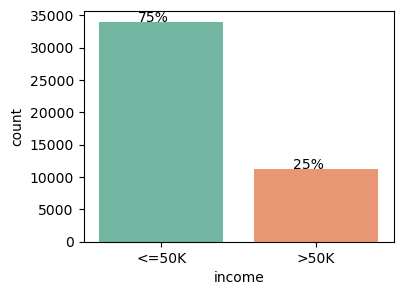

In [7]:
plt.figure(figsize=(4,3))
x=sns.countplot(data=df,x='income',palette='Set2')
for i in x.patches:
    x.annotate('{:.0f}'.format((i.get_height()/df.shape[0])*100)+'%',(i.get_x()+0.25, i.get_height()+0.01))
plt.show()

### income ~ gender

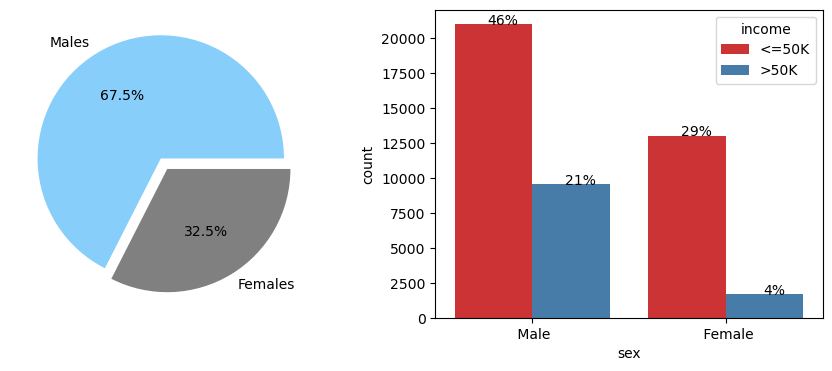

In [8]:
plt.figure(figsize=(11,4))

plt.subplot(1, 2, 1)
labels = ['Males', 'Females']
sizes = [df['sex'].value_counts()[0], df['sex'].value_counts()[1]]
colors = ['lightskyblue', 'grey']
explode = (0.05, 0.05)  # explode 1st slice
plt.pie(sizes, explode=explode, labels=labels, autopct='%.1f%%', colors=colors, data = df);

plt.subplot(1, 2, 2)
x=sns.countplot(data=df,x='sex',hue='income',palette='Set1')
for i in x.patches:
    x.annotate('{:.0f}'.format((i.get_height()/df.shape[0])*100)+'%',(i.get_x()+0.25, i.get_height()+0.01), ha='center')
plt.show()

In [9]:
x=pd.crosstab(df['sex'],df['income'])
x=x.astype(float)
x

income,<=50K,>50K
sex,,
Female,13026.0,1669.0
Male,20988.0,9539.0


In [10]:
gender_sum_list=list(x.transpose().sum().values)

In [11]:
for idx in range(x.values.shape[0]):
    x.values[idx]= x.values[idx]/gender_sum_list[idx]*100
x

income,<=50K,>50K
sex,,
Female,88.642395,11.357605
Male,68.752252,31.247748


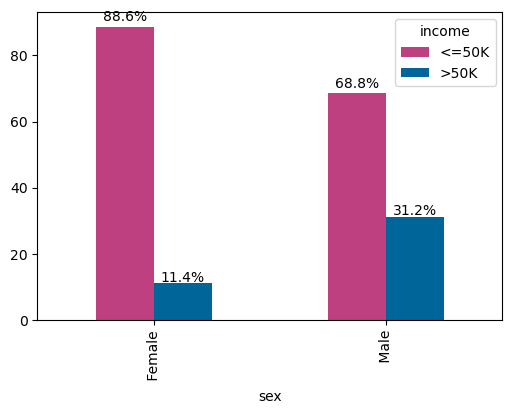

In [12]:
ax=x.plot(kind="bar",figsize=(6,4),color=['#bf4080','#006699']);

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    z, y = p.get_xy() 
    ax.annotate(f'{height:.3}%', (z + width/2, y + height*1.02), ha='center')

##### 31% of men earns more than 50k dollars while only 11% of women earns more than 50k dollars in a year 

### income ~ age

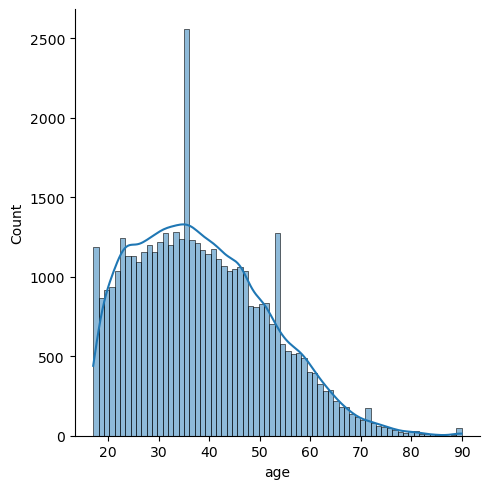

In [13]:
sns.displot(df['age'],kde=True)

<AxesSubplot:xlabel='age', ylabel='Density'>

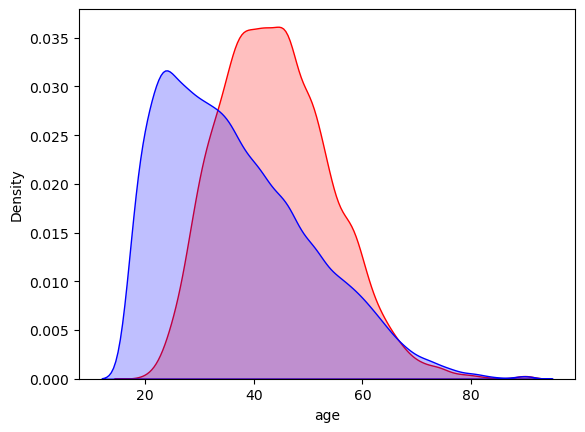

In [14]:
sns.kdeplot(data=df[df['income']=='>50K'],x='age',shade=True,color='r')
sns.kdeplot(data=df[df['income']=='<=50K'],x='age',shade=True,color='b')

In [15]:
age = pd.cut(df['age'],bins=[16,30,40,50,60,70,100],labels=['17:30','31:40','41:50','51:65','61:70','80 and older'])
age.value_counts()

17:30           14260
31:40           12291
41:50            9990
51:65            5833
61:70            2212
80 and older      636
Name: age, dtype: int64

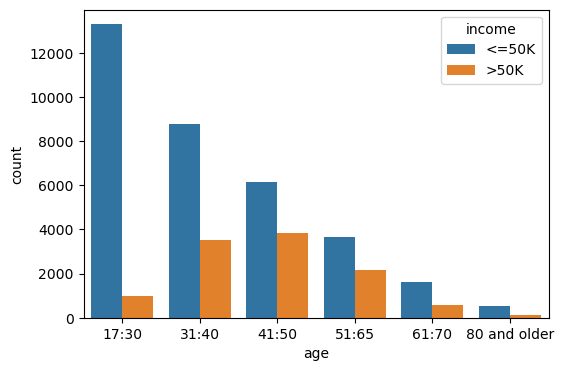

In [16]:
plt.figure(figsize=(6,4))
sns.countplot(data=df,hue='income',x=age);

In [17]:
x=pd.crosstab(age,df['income'])
x=x.astype(float)
x

income,<=50K,>50K
age,,
17:30,13296.0,964.0
31:40,8785.0,3506.0
41:50,6131.0,3859.0
51:65,3664.0,2169.0
61:70,1628.0,584.0
80 and older,510.0,126.0


In [18]:
#sum of each age group
age_sum_list=list(x.transpose().sum().values)
age_sum_list

[14260.0, 12291.0, 9990.0, 5833.0, 2212.0, 636.0]

In [19]:
for idx in range(x.values.shape[0]):
    x.values[idx]= x.values[idx]/age_sum_list[idx]*100
x

income,<=50K,>50K
age,,
17:30,93.239832,6.760168
31:40,71.475063,28.524937
41:50,61.371371,38.628629
51:65,62.815018,37.184982
61:70,73.598553,26.401447
80 and older,80.188679,19.811321


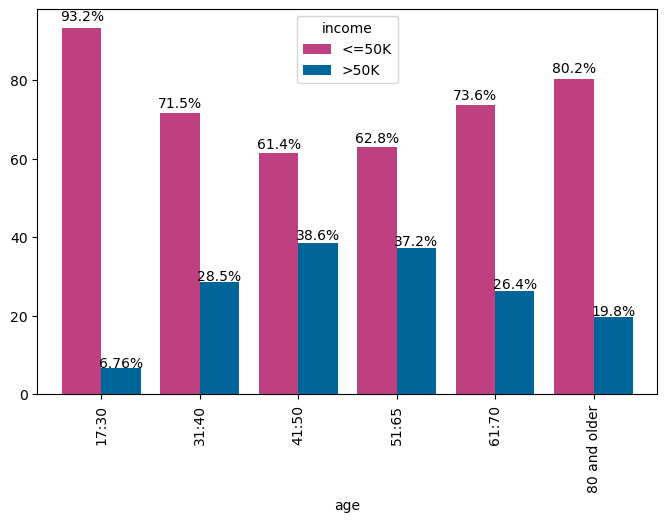

In [20]:
ax=x.plot(kind="bar",figsize=(8,5),color=['#bf4080','#006699'],width = 0.8);

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    z, y = p.get_xy() 
    ax.annotate(f'{height:.3}%', (z + width/2, y + height*1.02), ha='center')

##### the chnace of getting earning more than 50k dollars increases as the age increases upto 60 
##### people from 41 to 60 are most probably to be donors for the charity as they have the greatest percentages to earn more than 50k dollars
##### young people have very low chance of earnings more than 50k dollars followed by very old people

### income ~ workclass

In [21]:
# Self-emp-inc ==> Incorporated self employment: Refers to people who work for themselves in corporate entities.
# Self-emp-not-inc ==> Unincorporated self employment: Refers to people who work for themselves in other legal entities.

df['workclass'].value_counts()

 Private             33307
 Self-emp-not-inc     3796
 Local-gov            3100
 State-gov            1946
 Self-emp-inc         1646
 Federal-gov          1406
 Without-pay            21
Name: workclass, dtype: int64

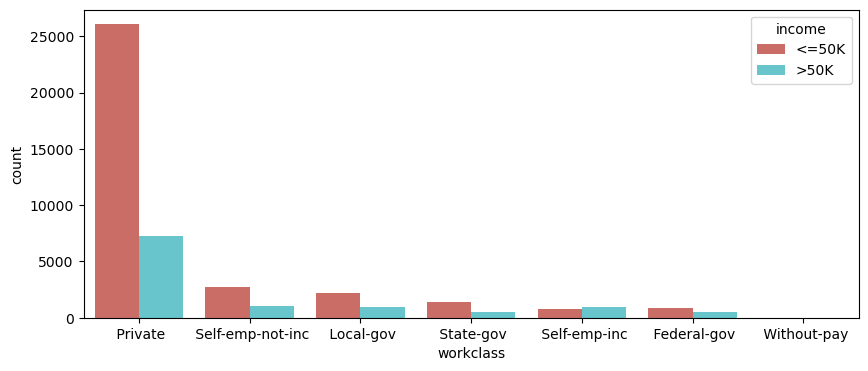

In [22]:
plt.figure(figsize=(10,4))
sns.countplot(data=df,x='workclass',hue='income',order=df['workclass'].value_counts().index,palette='hls');

In [23]:
x=pd.crosstab(df['workclass'],df['income'])
x=x.astype(float)
x

income,<=50K,>50K
workclass,,
Federal-gov,857.0,549.0
Local-gov,2185.0,915.0
Private,26056.0,7251.0
Self-emp-inc,734.0,912.0
Self-emp-not-inc,2737.0,1059.0
State-gov,1426.0,520.0
Without-pay,19.0,2.0


In [24]:
#sum of each age group
workclass_sum_list=list(x.transpose().sum().values)
workclass_sum_list

[1406.0, 3100.0, 33307.0, 1646.0, 3796.0, 1946.0, 21.0]

In [25]:
for idx in range(x.values.shape[0]):
    x.values[idx]= x.values[idx]/workclass_sum_list[idx]*100
    
x.sort_values('>50K',inplace=True,ascending=False)
x

income,<=50K,>50K
workclass,,
Self-emp-inc,44.592953,55.407047
Federal-gov,60.953058,39.046942
Local-gov,70.483871,29.516129
Self-emp-not-inc,72.102213,27.897787
State-gov,73.278520,26.721480
Private,78.229802,21.770198
Without-pay,90.476190,9.523810


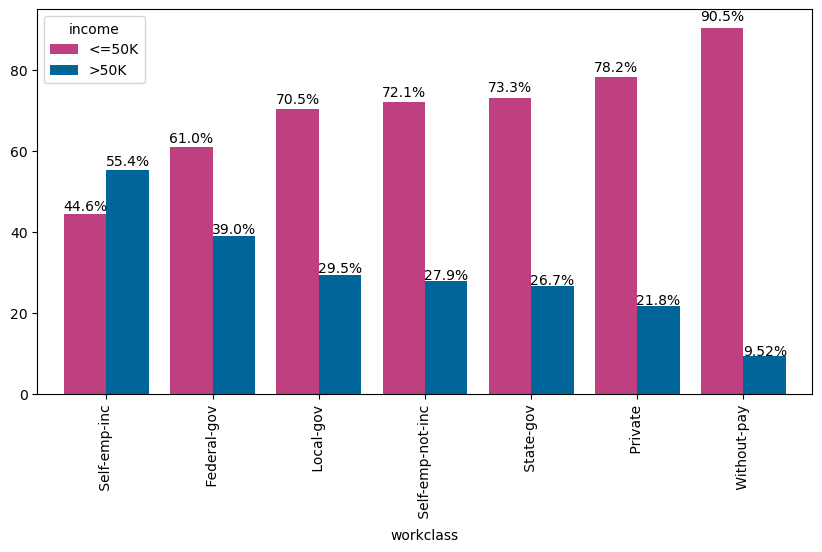

In [26]:
ax=x.plot(kind="bar",figsize=(10,5),color=['#bf4080','#006699'],width = 0.8);

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    z, y = p.get_xy() 
    ax.annotate(f'{height:.3}%', (z + width/2, y + height*1.02), ha='center')

##### Incorporated self employment is the only category where the number of people of annual income more than 50k dollars exceeded those who earn less than 50k dollars 
##### in all workcalss cetegories, more than two thirds of people earn less than 50k dollars except for fedral government as the percentage of people earnings more than 50k dollars is 39% which is high compared to pther categories 
##### there are only 21 people without pay so it's hard to get any observations for them 

###   work classes & age


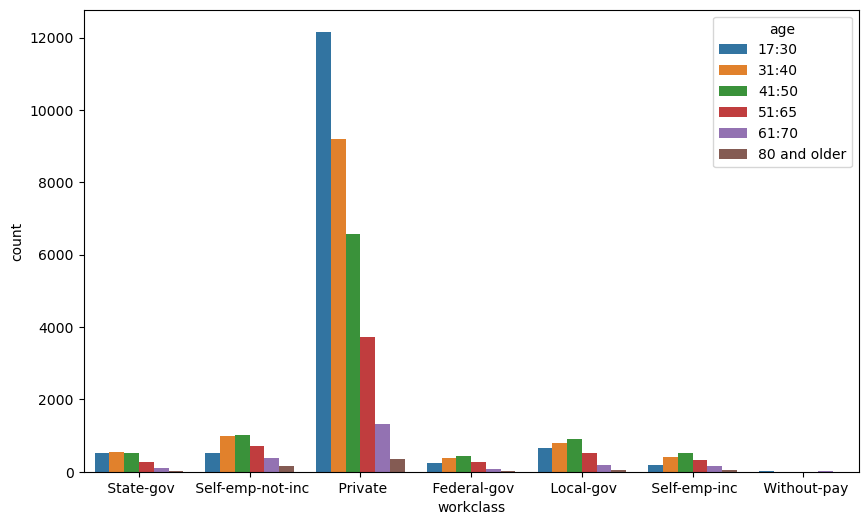

In [27]:
plt.figure(figsize=(10,6))
sns.countplot(data=df,hue=age,x='workclass');

- For the highest 3 profitable jobs, people from 41 to 50 are the most working age group following them people from 31 to 40
- Most working emplyees for private sector are young people especially those who 17 to 30

### education level ~ income

In [28]:
df['education_level'].value_counts()

 HS-grad         14783
 Some-college     9899
 Bachelors        7570
 Masters          2514
 Assoc-voc        1959
 11th             1619
 Assoc-acdm       1507
 10th             1223
 7th-8th           823
 Prof-school       785
 9th               676
 12th              577
 Doctorate         544
 5th-6th           449
 1st-4th           222
 Preschool          72
Name: education_level, dtype: int64

In [29]:
df['education_level'].replace([' 11th', ' 9th', ' 7th-8th', ' 5th-6th', ' 10th', ' 1st-4th', ' Preschool', '12th'],' School',inplace=True)
df['education_level'].value_counts()

 HS-grad         14783
 Some-college     9899
 Bachelors        7570
 School           5084
 Masters          2514
 Assoc-voc        1959
 Assoc-acdm       1507
 Prof-school       785
 12th              577
 Doctorate         544
Name: education_level, dtype: int64

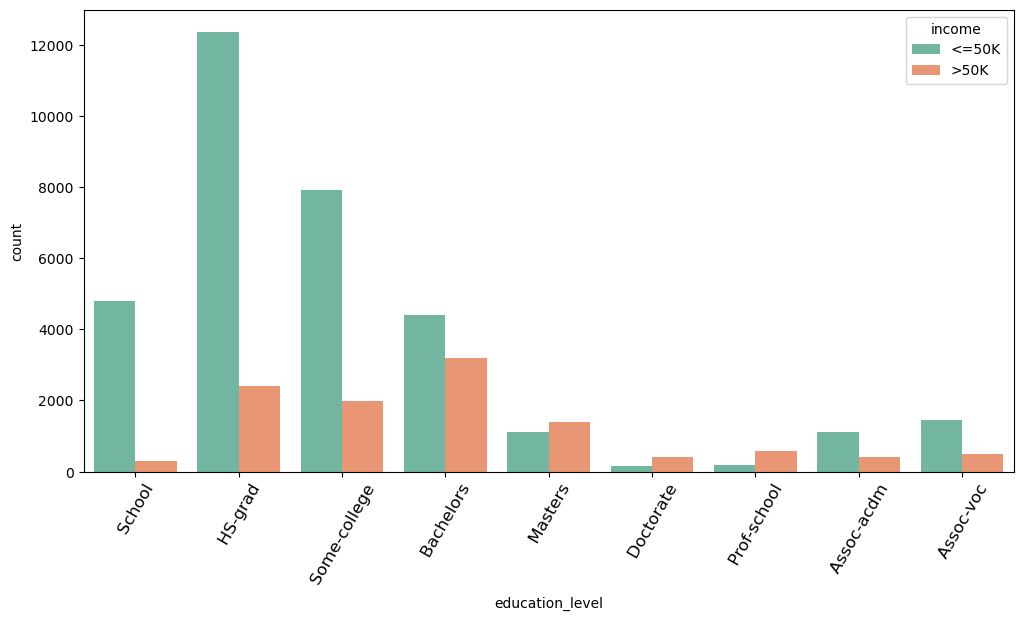

In [30]:
plt.figure(figsize=(12,6))
order_list = [' School', 
                ' HS-grad', ' Some-college', ' Bachelors', ' Masters', ' Doctorate', ' Prof-school', 
              ' Assoc-acdm',' Assoc-voc']
sns.countplot(data=df,x='education_level',hue='income',palette='Set2',order=order_list);
plt.xticks(fontsize=12,rotation = 60);

In [31]:
x=pd.crosstab(df['education_level'],df['income'])
x=x.astype(float)
x

income,<=50K,>50K
education_level,,
12th,534.0,43.0
Assoc-acdm,1109.0,398.0
Assoc-voc,1455.0,504.0
Bachelors,4392.0,3178.0
Doctorate,145.0,399.0
HS-grad,12367.0,2416.0
Masters,1121.0,1393.0
Prof-school,193.0,592.0
School,4789.0,295.0


In [32]:
#sum of each age group
edu_lvl_sum_list=list(x.transpose().sum().values)
edu_lvl_sum_list

[577.0, 1507.0, 1959.0, 7570.0, 544.0, 14783.0, 2514.0, 785.0, 5084.0, 9899.0]

In [33]:
for idx in range(x.values.shape[0]):
    x.values[idx]= x.values[idx]/edu_lvl_sum_list[idx]*100

x.sort_values('>50K',inplace=True,ascending=False)
x

income,<=50K,>50K
education_level,,
Prof-school,24.585987,75.414013
Doctorate,26.654412,73.345588
Masters,44.590294,55.409706
Bachelors,58.018494,41.981506
Assoc-acdm,73.589914,26.410086
Assoc-voc,74.272588,25.727412
Some-college,79.896959,20.103041
HS-grad,83.656903,16.343097
12th,92.547660,7.452340


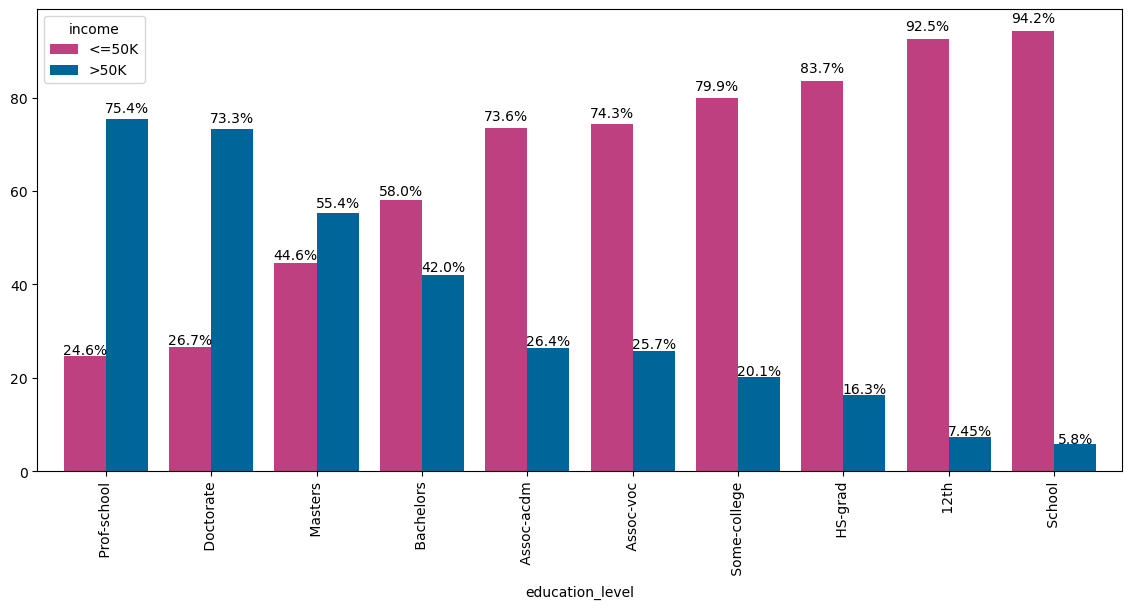

In [34]:
ax=x.plot(kind="bar",figsize=(14,6),color=['#bf4080','#006699'],width = 0.8);

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    z, y = p.get_xy() 
    ax.annotate(f'{height:.3}%', (z + width/2, y + height*1.02), ha='center')

##### Very few people who didn't graduate from high school earn more than 50k dollars annually 
##### For people belonging to prof-school,doctorate and masters categories, number of people who earns more than 50k exceeds those who don't earn that much 
##### People who finished Bachlors have good chance of earning more than 50k dollars a year  

### marital status ~ income

In [35]:
# Married-civ-spouse corresponds to a civilian spouse 
# Married-AF-spouse is a spouse in the Armed Forces.

df['marital-status'].value_counts()

 Married-civ-spouse       21055
 Never-married            14598
 Divorced                  6297
 Separated                 1411
 Widowed                   1277
 Married-spouse-absent      552
 Married-AF-spouse           32
Name: marital-status, dtype: int64

<AxesSubplot:xlabel='count', ylabel='marital-status'>

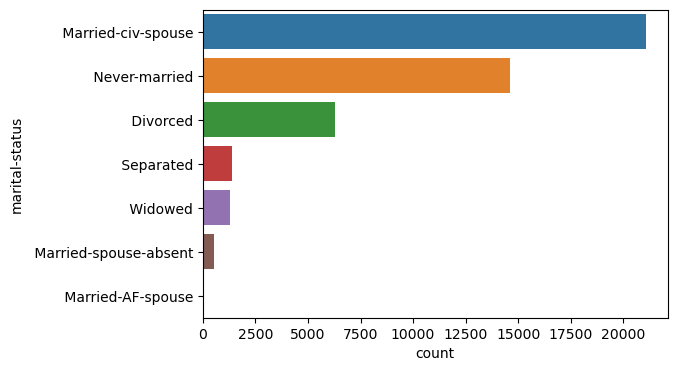

In [36]:
plt.figure(figsize=(6,4))
sns.countplot(data=df,y='marital-status',order=df['marital-status'].value_counts().index)

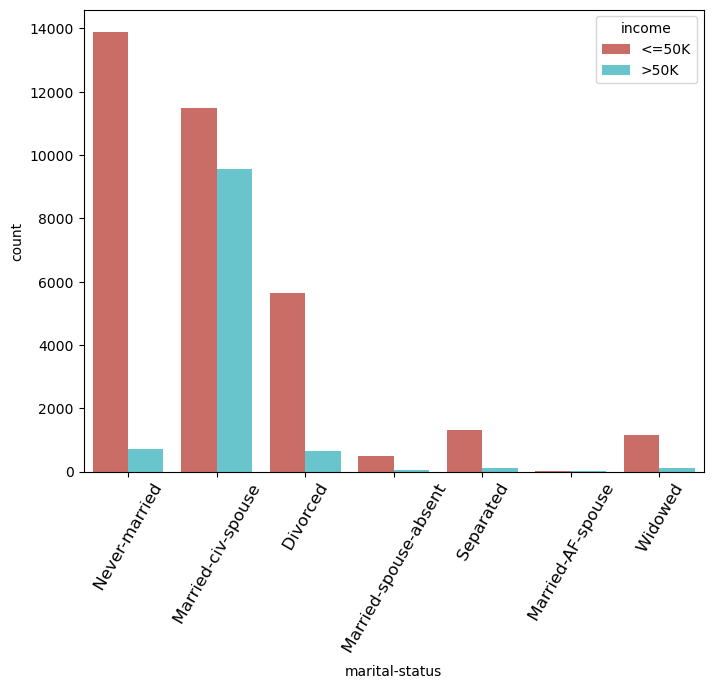

In [37]:
plt.figure(figsize=(8,6))
sns.countplot(data=df,x='marital-status',hue='income',palette='hls')
plt.xticks(fontsize=12,rotation = 60);

- One thing to note here is that Married-civ-spouse is the only category which has comparable number of people belonging to both categories.
- For others, there are less than 25% of the adults earning more than 50K dollars an year.

### Occupation

In [38]:
df['occupation'].value_counts()

 Craft-repair         6020
 Prof-specialty       6008
 Exec-managerial      5984
 Adm-clerical         5540
 Sales                5408
 Other-service        4808
 Machine-op-inspct    2970
 Transport-moving     2316
 Handlers-cleaners    2046
 Farming-fishing      1480
 Tech-support         1420
 Protective-serv       976
 Priv-house-serv       232
 Armed-Forces           14
Name: occupation, dtype: int64

In [39]:
x=pd.crosstab(df['occupation'],df['income'])
x=x.astype(float)

In [40]:
#sum of each age group
occ_sum_list=list(x.transpose().sum().values)

In [41]:
for idx in range(x.values.shape[0]):
    x.values[idx]= x.values[idx]/occ_sum_list[idx]*100
x.sort_values('>50K',inplace=True,ascending=False)
x

income,<=50K,>50K
occupation,,
Exec-managerial,52.088904,47.911096
Prof-specialty,54.993342,45.006658
Protective-serv,68.545082,31.454918
Tech-support,71.056338,28.943662
Armed-Forces,71.428571,28.571429
Sales,73.095414,26.904586
Craft-repair,77.491694,22.508306
Transport-moving,79.360967,20.639033
Adm-clerical,86.353791,13.646209


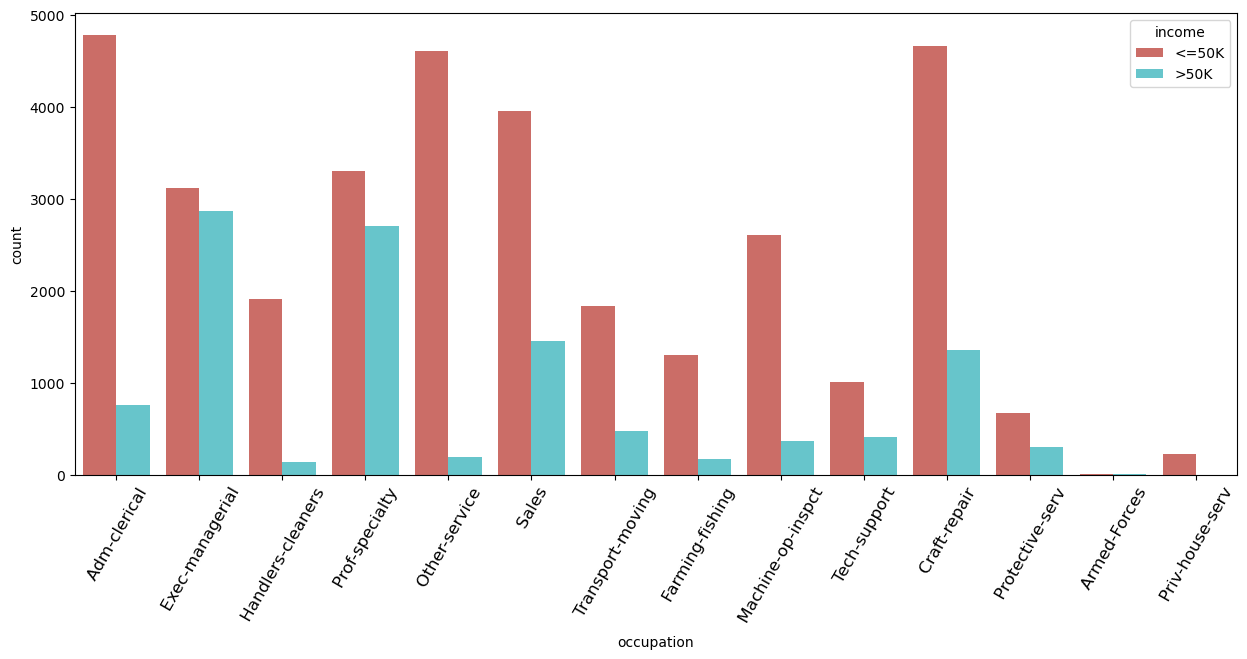

In [42]:
plt.figure(figsize=(15,6))
sns.countplot(data=df,x='occupation',hue='income',palette='hls')
plt.xticks(fontsize=12,rotation = 60);

- People in exec-managerial role are nearly equally likely to earn more than 50K dollars a year as well as adults in prof specialty.
- People working in Adm-clerical, Machine-op-inspct, Farming-fishing, Handlers-cleaners, Priv-house-serv roles have probabilities less than 14% to earn more than 50k dollars annually 
- There are only 14 people in Armed-Forces role so it's very hard to get any observation for them
-  More than 25% of people working in Protective-serv, Tech-support, and Sales earn more than 50k dollars a year


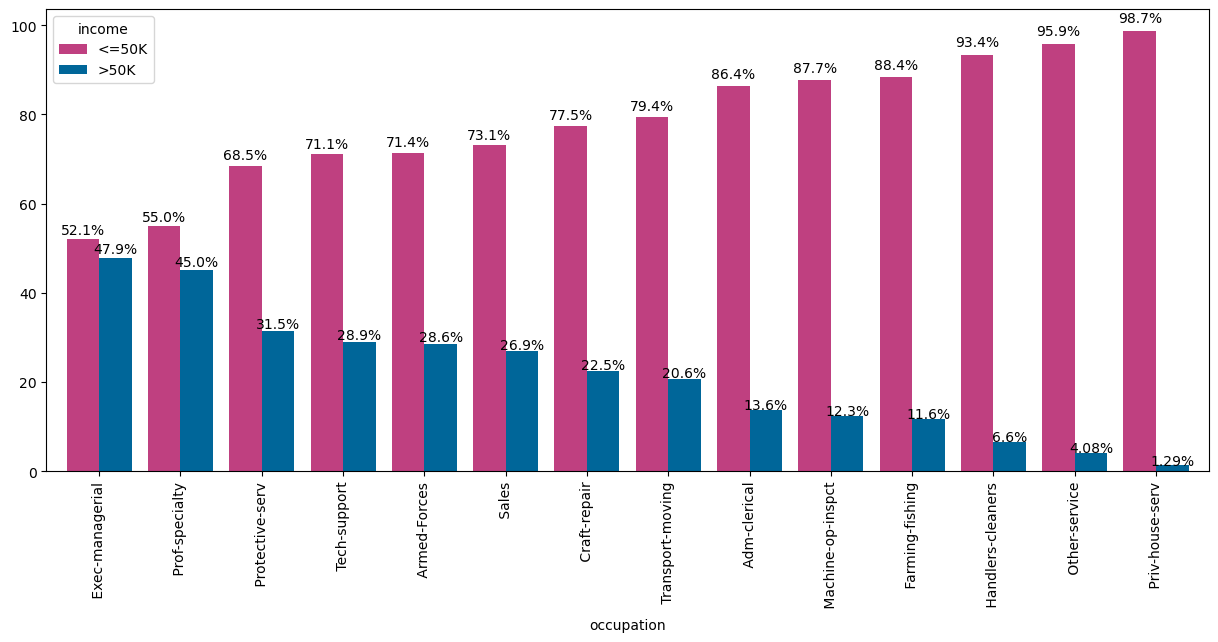

In [43]:
ax=x.plot(kind="bar",figsize=(15,6),color=['#bf4080','#006699'],width = 0.8);
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    z, y = p.get_xy() 
    ax.annotate(f'{height:.3}%', (z + width/2, y + height*1.02), ha='center')

### Ralationship

In [44]:
df['relationship'].value_counts()

 Husband           18666
 Not-in-family     11702
 Own-child          6626
 Unmarried          4788
 Wife               2091
 Other-relative     1349
Name: relationship, dtype: int64

In [45]:
x=pd.crosstab(df['relationship'],df['income'])
x=x.astype(float)

In [46]:
#sum of each age group
rel_sum_list=list(x.transpose().sum().values)

In [47]:
for idx in range(x.values.shape[0]):
    x.values[idx]= x.values[idx]/rel_sum_list[idx]*100
x.sort_values('>50K',inplace=True,ascending=False)
x

income,<=50K,>50K
relationship,,
Wife,51.410808,48.589192
Husband,54.425158,45.574842
Not-in-family,89.506067,10.493933
Unmarried,93.692565,6.307435
Other-relative,96.293551,3.706449
Own-child,98.415334,1.584666


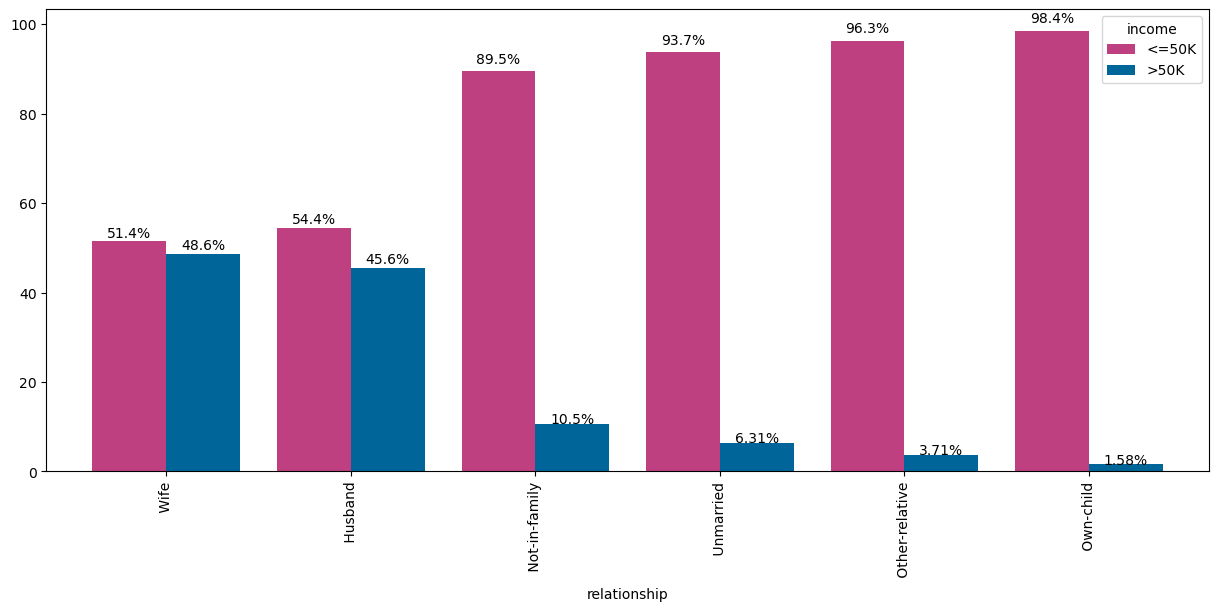

In [48]:
ax=x.plot(kind="bar",figsize=(15,6),color=['#bf4080','#006699'],width = 0.8);
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    z, y = p.get_xy() 
    ax.annotate(f'{height:.3}%', (z + width/2, y + height*1.02), ha='center')

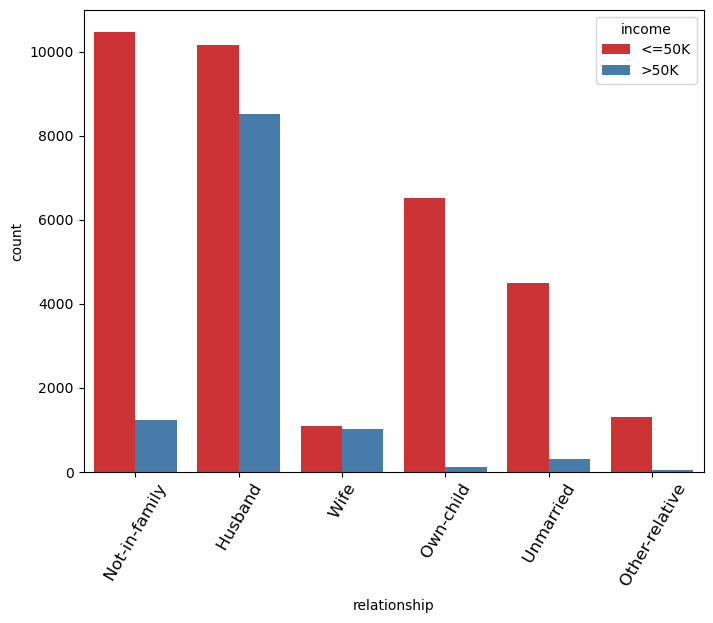

In [49]:
plt.figure(figsize=(8,6))
sns.countplot(data=df,x='relationship',hue='income',palette='Set1')
plt.xticks(fontsize=12,rotation = 60);

- wives and husbands have possibility greater than 45% to earn more than 50k a year
- Only 10% of people who are not in family earn more 50k dollars annually 

### Race

In [50]:
df['race'].value_counts()

 White                 38903
 Black                  4228
 Asian-Pac-Islander     1303
 Amer-Indian-Eskimo      435
 Other                   353
Name: race, dtype: int64

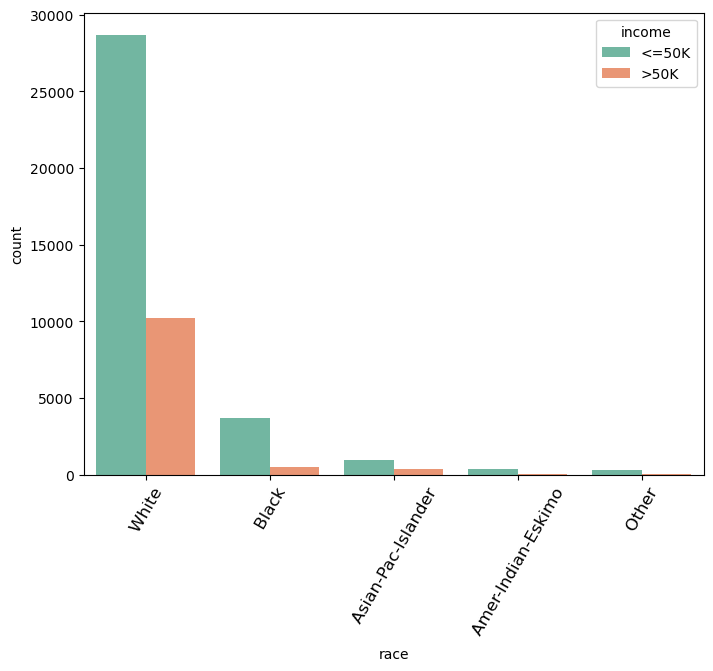

In [51]:
plt.figure(figsize=(8,6))
sns.countplot(data=df,x='race',hue='income',palette='Set2')
plt.xticks(fontsize=12,rotation = 60);

##### It's hard to get clear observation for race as more than 86% of the people are white 

### Working hours

<AxesSubplot:xlabel='hours-per-week', ylabel='Density'>

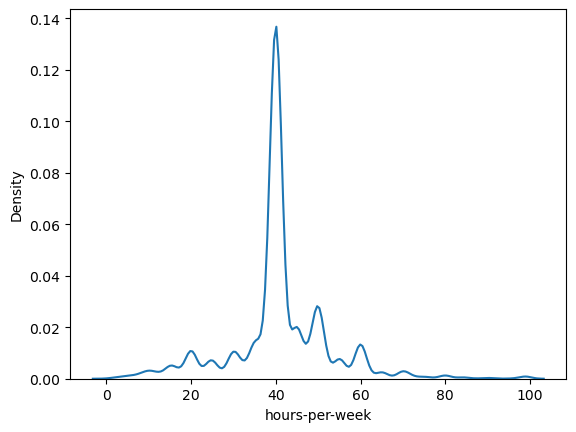

In [52]:
sns.kdeplot(data=df,x='hours-per-week')

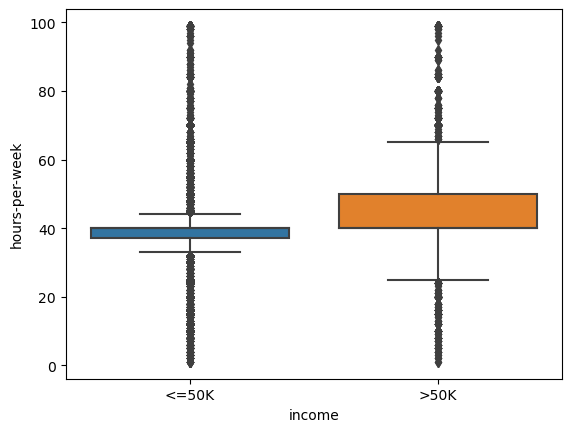

In [53]:
sns.boxplot(data=df,y='hours-per-week',x='income');

- As expected, there is a huge difference between people with high income and those with low income, as people with high income tend to work more hours per week

In [54]:
# Full-time employment is usually considered between 30-40 hours a week, 
# while part-time employment is usually less than 30 hours a week.
hrs_per_week = pd.cut(df['hours-per-week'],bins=[0,30,40,60,100],labels=['Part-time','Full-time','Over-time','Too-much'])
hrs_per_week.value_counts()

Full-time    24910
Over-time    12188
Part-time     6535
Too-much      1589
Name: hours-per-week, dtype: int64

In [55]:
x=pd.crosstab(hrs_per_week,[df['income']])
x=x.astype(float)
sum_list=list(x.transpose().sum().values)


In [56]:
for idx in range(x.values.shape[0]):
    x.values[idx]= x.values[idx]/sum_list[idx]*100
# x.sort_values('>50K',inplace=True,ascending=False)
x

income,<=50K,>50K
hours-per-week,,
Part-time,93.420046,6.579954
Full-time,79.088719,20.911281
Over-time,59.074500,40.925500
Too-much,63.436123,36.563877


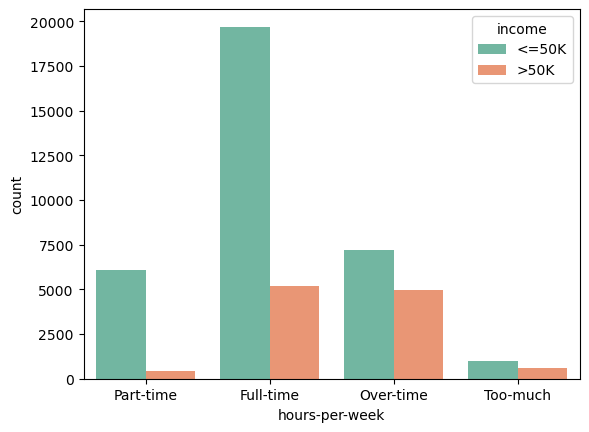

In [57]:
sns.countplot(data=df,x=hrs_per_week,hue='income',palette='Set2');

- Part-time eployees very low chance of earning more than 50k dollars a year 
- Full-time emplyees have fair chance to earn 50k dollars, but people who work too much and over-time hourse per week have the highest probability to earn more than 50k dollars a year

### age & working hours

In [58]:
x=pd.crosstab(hrs_per_week,age)
x=x.astype(float)
sum_list=list(x.transpose().sum().values)

for idx in range(x.values.shape[0]):
    x.values[idx]= x.values[idx]/sum_list[idx]*100
# x.sort_values('>50K',inplace=True,ascending=False)
x

age,17:30,31:40,41:50,51:65,61:70,80 and older
hours-per-week,,,,,,
Part-time,55.547054,12.364193,9.671002,7.283856,9.732211,5.401683
Full-time,30.919310,27.788037,22.300281,13.741469,4.452027,0.798876
Over-time,21.471940,33.106334,27.600919,14.005579,3.257302,0.557926
Too-much,19.572058,33.102580,27.627439,14.285714,4.405286,1.006923


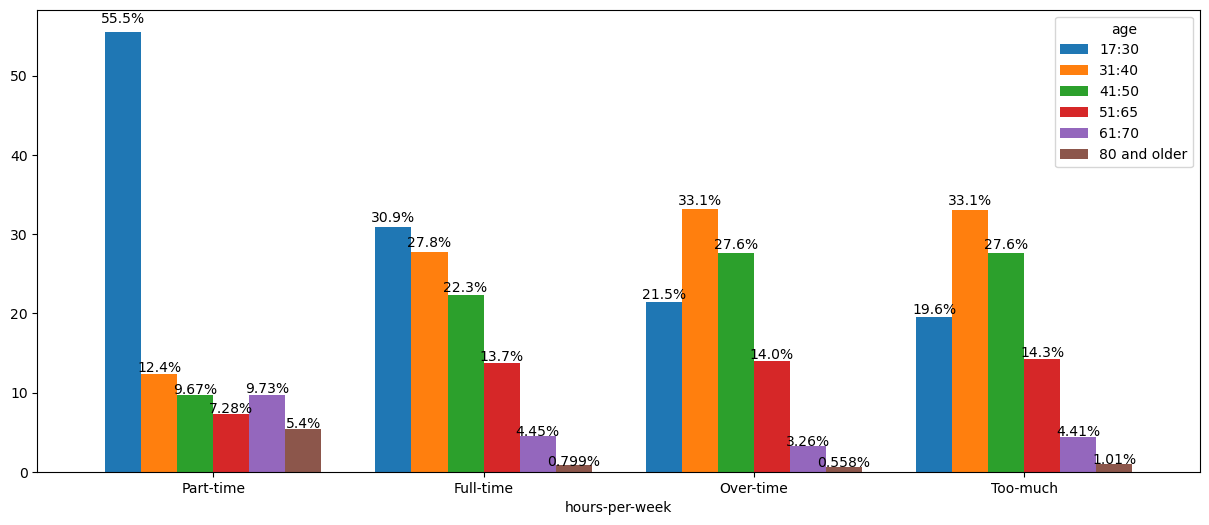

In [59]:
ax=x.plot(kind="bar",figsize=(15,6),width = 0.8);
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    z, y = p.get_xy() 
    ax.annotate(f'{height:.3}%', (z + width/2, y + height*1.02), ha='center')

- Most of the part time jobs employees are young people from 17 to 30
- On the other hand, Adults from 31 to 50 tend to work in jobs with higher hours per week
- Old people occupy small portion of every job type

### gender & work classes 

In [60]:
# previous obsrvations show that men tend to earn more than 50k dollars when compaared to women
# incoporated people tend to earn more money 

In [61]:
x=pd.crosstab(df['sex'],[df['workclass']])
x=x.astype(float)
x

workclass,Federal-gov,Local-gov,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay
sex,,,,,,,
Female,445.0,1244.0,11428.0,199.0,617.0,755.0,7.0
Male,961.0,1856.0,21879.0,1447.0,3179.0,1191.0,14.0


In [62]:
#sum of each age group
gen_work_sum_list=list(x.transpose().sum().values)
gen_work_sum_list

[14695.0, 30527.0]

In [63]:
for idx in range(x.values.shape[0]):
    x.values[idx]= x.values[idx]/gen_work_sum_list[idx]*100
# x.sort_values('>50K',inplace=True,ascending=False)
x

workclass,Federal-gov,Local-gov,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay
sex,,,,,,,
Female,3.028241,8.465464,77.767948,1.354202,4.198707,5.137802,0.047635
Male,3.148033,6.079864,71.670980,4.740066,10.413732,3.901464,0.045861


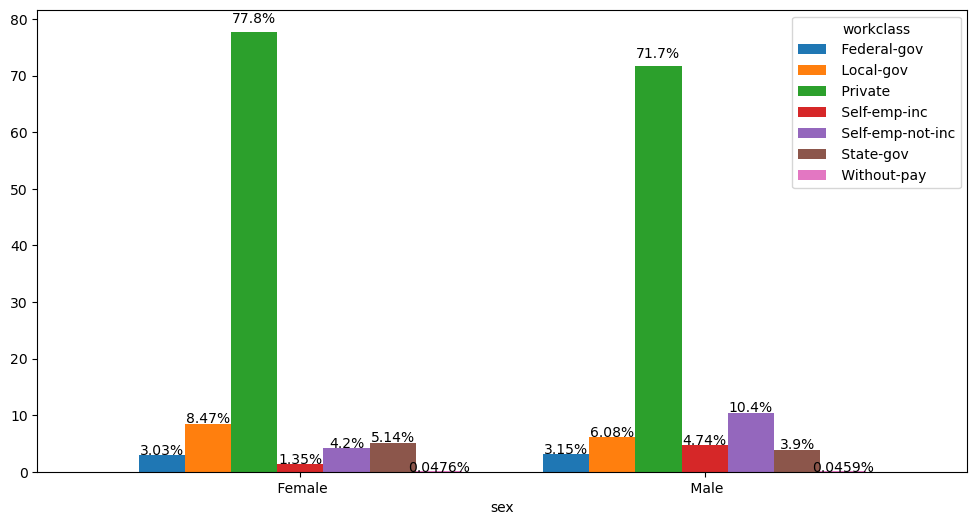

In [64]:
# ,color=['#bf4080','#006699']
# 
ax=x.plot(kind="bar",figsize=(12,6),width = 0.8);
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    z, y = p.get_xy() 
    ax.annotate(f'{height:.3}%', (z + width/2, y + height*1.02), ha='center')

- Nearly 5% of men work in category self_emp_inc which is The most profitable category of work ,while less than 1.5% of women work in that category 
- For fedral government(one of the highest work categories), although nearly 3% of each gender work in that category but two thirds of fedral government employees are men 
- Higher percentages of women work in private sector and state government which don't pay that much   

### education level & workclass 

In [65]:
x=pd.crosstab([df['workclass']],df['education_level'])
x=x.astype(float)
sum_list=list(x.transpose().sum().values)
sum_list


[1406.0, 3100.0, 33307.0, 1646.0, 3796.0, 1946.0, 21.0]

In [66]:
for idx in range(x.values.shape[0]):
    x.values[idx]= x.values[idx]/sum_list[idx]*100
# x.sort_values('>50K',inplace=True,ascending=False)
x

education_level,12th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Prof-school,School,Some-college
workclass,,,,,,,,,,
Federal-gov,0.568990,5.761024,4.267425,21.692745,1.422475,27.880512,7.467994,2.418208,2.916074,25.604552
Local-gov,0.806452,4.096774,3.967742,22.290323,1.096774,24.290323,16.677419,1.290323,6.548387,18.935484
Private,1.477167,3.200528,4.422494,15.495241,0.753595,34.614345,4.002162,1.038821,12.709040,22.286606
Self-emp-inc,0.729040,3.523694,3.462940,24.483597,3.219927,25.151883,6.682868,7.715674,5.164034,19.866343
Self-emp-not-inc,0.763962,2.897787,4.504742,15.463646,1.844046,33.350896,5.242360,5.110643,11.933614,18.888303
State-gov,0.565262,3.237410,3.854060,21.736896,5.960946,21.325797,12.846865,2.261048,3.442960,24.768756
Without-pay,0.000000,9.523810,0.000000,0.000000,0.000000,66.666667,0.000000,0.000000,9.523810,14.285714


- Most good-paid jobs emplyees tend to have higher education level 

### workclass & working hours 

In [67]:
df['workclass'].value_counts()

 Private             33307
 Self-emp-not-inc     3796
 Local-gov            3100
 State-gov            1946
 Self-emp-inc         1646
 Federal-gov          1406
 Without-pay            21
Name: workclass, dtype: int64

In [68]:
x=pd.crosstab(df['workclass'],hrs_per_week)
x=x.astype(float)
sum_list=list(x.transpose().sum().values)

for idx in range(x.values.shape[0]):
    x.values[idx]= x.values[idx]/sum_list[idx]*100
# x.sort_values('>50K',inplace=True,ascending=False)
x

hours-per-week,Part-time,Full-time,Over-time,Too-much
workclass,,,,
Federal-gov,5.476529,72.830725,19.843528,1.849218
Local-gov,10.806452,62.129032,24.161290,2.903226
Private,14.978833,56.849911,25.658270,2.512985
Self-emp-inc,7.776428,30.315917,50.668287,11.239368
Self-emp-not-inc,18.387777,33.693361,37.592202,10.326660
State-gov,15.313464,63.823227,17.882837,2.980473
Without-pay,47.619048,23.809524,23.809524,4.761905


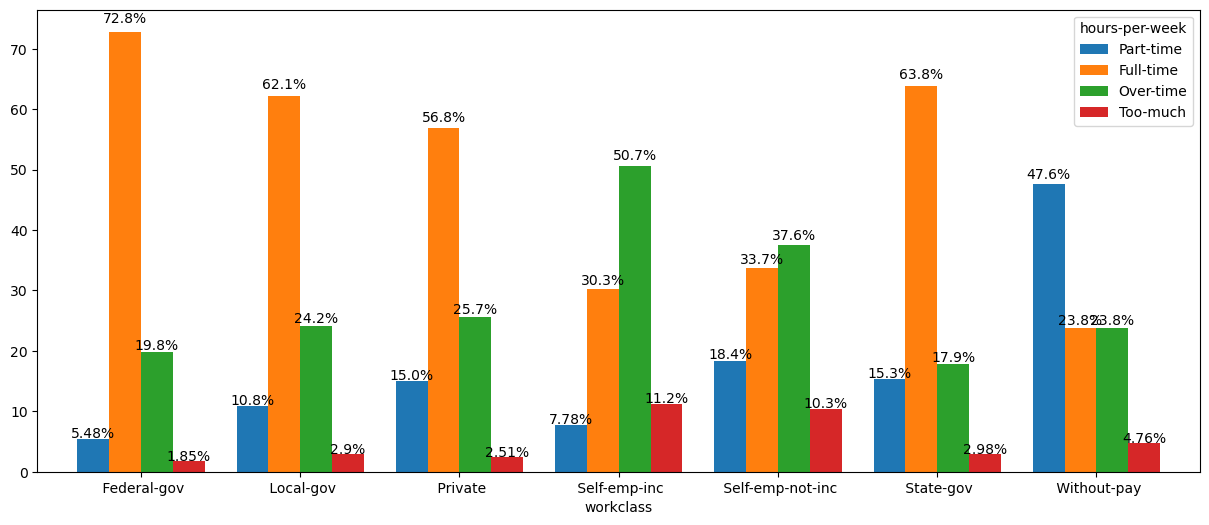

In [69]:
ax=x.plot(kind="bar",figsize=(15,6),width = 0.8);
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    z, y = p.get_xy() 
    ax.annotate(f'{height:.3}%', (z + width/2, y + height*1.02), ha='center')

- Incorporated self employemnt and fedral government have the highest percentages of full time and over time jobs which may explain why they are the most profitable work categories

## Outliers

age


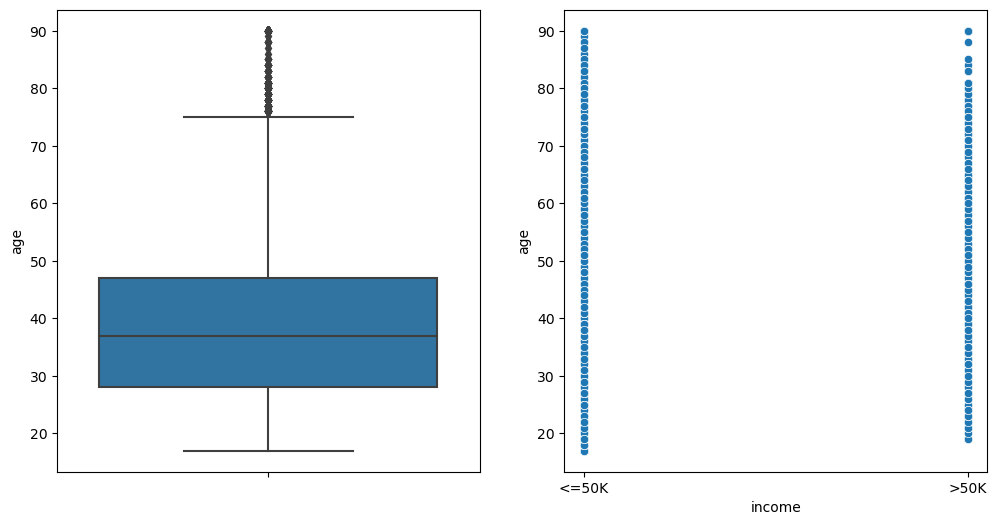

education-num


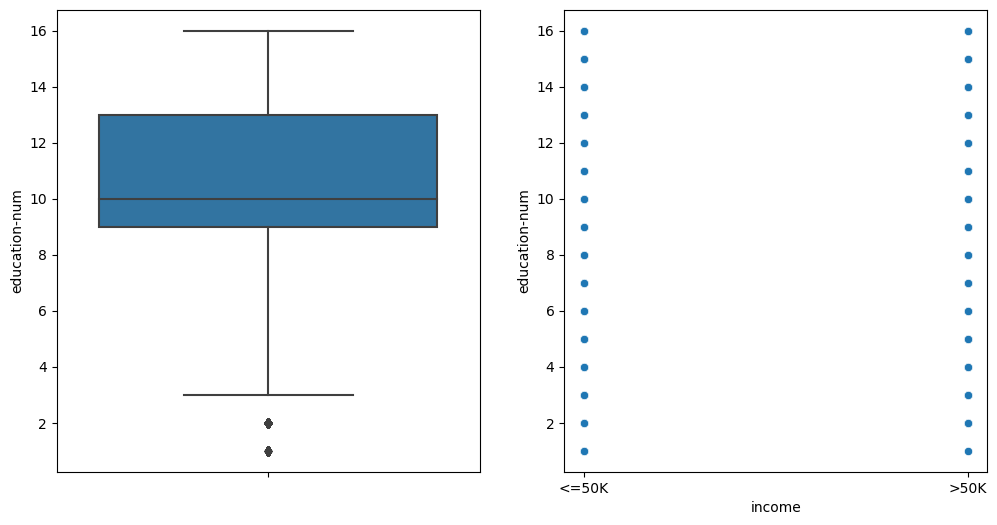

hours-per-week


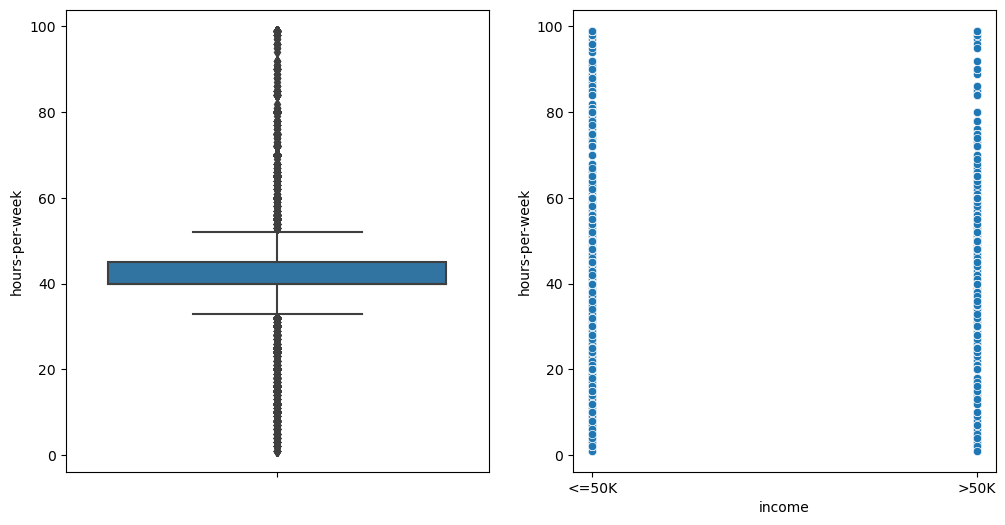

capital-gain


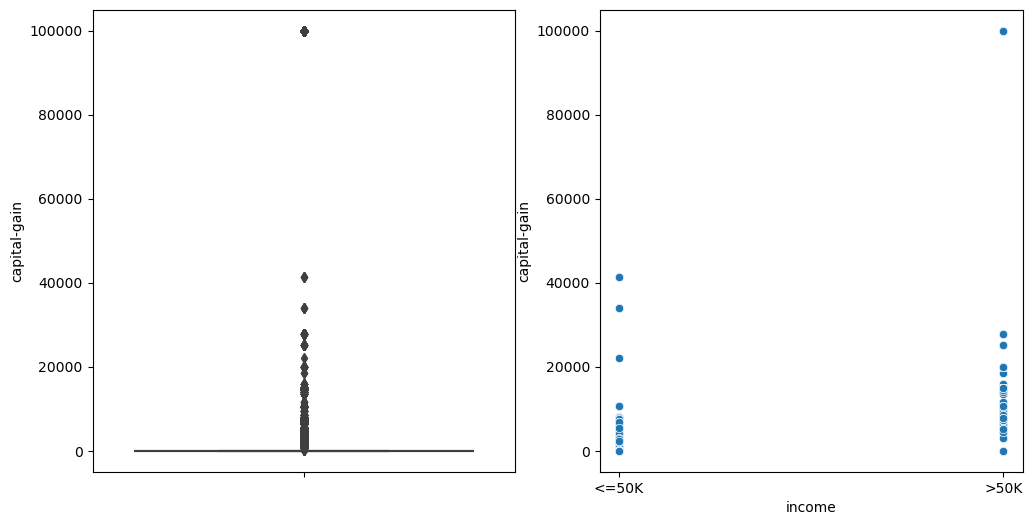

capital-loss


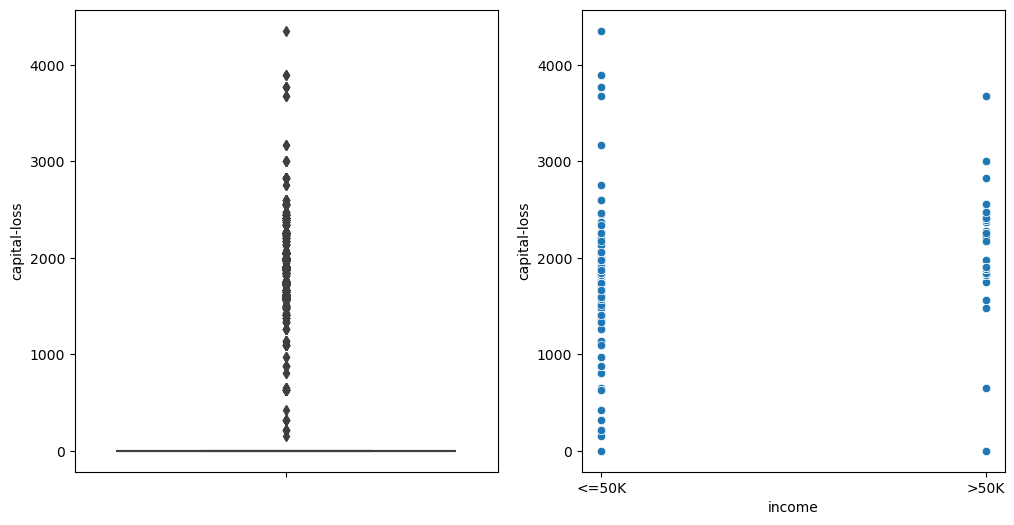

In [70]:
num_cols=['age','education-num','hours-per-week','capital-gain','capital-loss']
for col in num_cols:
    print(col)
    plt.figure(figsize = (12,6))
    plt.subplot(1, 2, 1)
    sns.boxplot(data=df,y=col)
    plt.subplot(1, 2, 2)
    sns.scatterplot(data=df,x='income',y=col)
    plt.show()

In [71]:
# Removing capital-gain outliers 
x=df[df['capital-gain']>16000]
x.shape

(357, 14)

In [72]:
df=df[df['capital-gain']<=16000]

In [73]:
x=df[(df['capital-loss']>2300)]
x.shape

(209, 14)

In [74]:
df=df[df['capital-loss']<=2300]

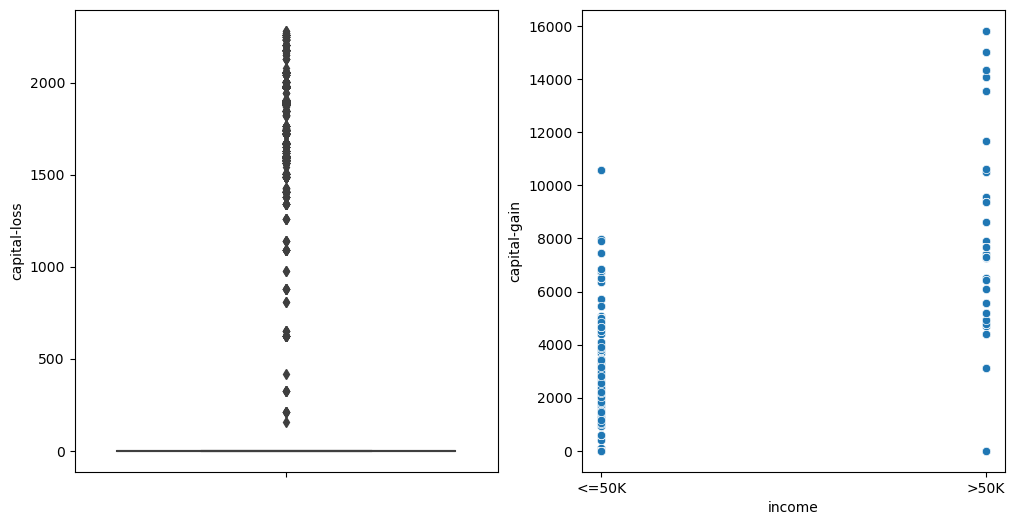

In [75]:
plt.figure(figsize = (12,6))
plt.subplot(1, 2, 1)
sns.boxplot(data=df,y=col)
plt.subplot(1, 2, 2)
sns.scatterplot(data=df,x='income',y='capital-gain')
plt.show()

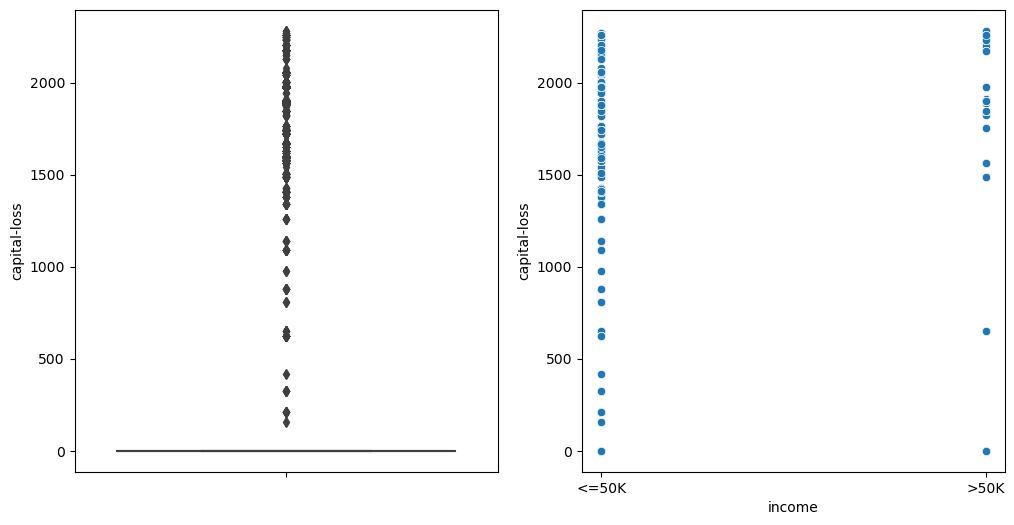

In [76]:
plt.figure(figsize = (12,6))
plt.subplot(1, 2, 1)
sns.boxplot(data=df,y=col)
plt.subplot(1, 2, 2)
sns.scatterplot(data=df,x='income',y='capital-loss')
plt.show()

## Encoding 

In [77]:
df['income'].replace({'>50K':1,'<=50K':0},inplace=True)

In [78]:
cat_cols=['workclass','education_level','marital-status', 'occupation', 'relationship', 'race', 'sex','native-country']
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

## split data

In [79]:
y = df['income']
x = df.drop(['income'], axis=1)

In [80]:
x_train , x_test , y_train , y_test = train_test_split(x,y , test_size= 0.25 , random_state=42)

## Scalling

In [81]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = pd.DataFrame(scaler.fit_transform(x_train), columns = x.columns)
x_test = pd.DataFrame(scaler.transform(x_test), columns = x.columns)

In [82]:
evalation=pd.DataFrame(columns=['Accuracy','Precision','Recall','F1-Score','MSE'])

In [83]:
evalation

,Accuracy,Precision,Recall,F1-Score,MSE


## ML Models

### Logistic Regression

In [84]:
model =LogisticRegression()
parameters = {
              'C':[100, 10, 1.0],
              'solver':['lbfgs', 'liblinear' 'saga']
}
classifier = GridSearchCV(model, parameters, cv=5);
# fitting the data to our model
classifier.fit(x, y);

In [85]:
# best parameters
best_parameters = classifier.best_params_
print(best_parameters)

{'C': 1.0, 'solver': 'lbfgs'}


In [86]:
# higest accuracy
highest_accuracy = classifier.best_score_*100
print(highest_accuracy,'%')

79.95566472377193 %


In [87]:
model =LogisticRegression(C= 100, solver= 'lbfgs')
model.fit(x_train , y_train)
y_test_pred = model.predict(x_test)
print('Train Score:',model.score(x_train , y_train))
print('Test Score:',model.score(x_test , y_test))

Train Score: 0.8191806998686253

Test Score: 0.8185238265854532


In [88]:
lr_acc=accuracy_score(y_test, y_test_pred)
print('Model accuracy score: {0:0.4f}'. format(lr_acc))

Model accuracy score: 0.8185


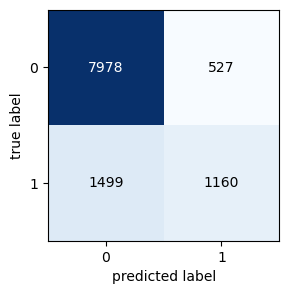

In [89]:
cm=confusion_matrix(y_test, y_test_pred)
plot_confusion_matrix(cm,figsize=(8,3)); 

In [90]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support



           0       0.84      0.94      0.89      8505

           1       0.69      0.44      0.53      2659



    accuracy                           0.82     11164

   macro avg       0.76      0.69      0.71     11164

weighted avg       0.81      0.82      0.80     11164




In [91]:
lr_precision=precision_score(y_test, y_test_pred)
lr_recall=recall_score(y_test, y_test_pred)
lr_f1=f1_score(y_test, y_test_pred)
lr_mse = mean_squared_error(y_test, y_test_pred)
lr_mse

0.18147617341454675

In [92]:
new_row = {'Accuracy': lr_acc,'Precision':lr_precision, 'Recall':lr_recall, 'F1-Score':lr_f1,'MSE':lr_mse}
evalation = evalation.append(new_row, ignore_index=True)

### KNN

In [93]:
model =KNeighborsClassifier()
parameters = {
              'leaf_size':[5,8,12],
              'n_neighbors':[6,8,11,14]
}
classifier = GridSearchCV(model, parameters, cv=5);
# fitting the data to our model
classifier.fit(x, y);

In [94]:
# best parameters
best_parameters = classifier.best_params_
print(best_parameters)

{'leaf_size': 5, 'n_neighbors': 14}


In [95]:
# higest accuracy
highest_accuracy = classifier.best_score_*100
print(highest_accuracy,'%')

84.3850788572969 %


In [96]:
model =KNeighborsClassifier(leaf_size= 12, n_neighbors= 14)
model.fit(x_train , y_train)
y_test_pred = model.predict(x_test)
print('Train Score:',model.score(x_train , y_train))
print('Test Score:',model.score(x_test , y_test))

Train Score: 0.8608025797205303

Test Score: 0.8427087065567896


In [97]:
knn_acc=accuracy_score(y_test, y_test_pred)
print('Model accuracy score: {0:0.4f}'. format(knn_acc))

Model accuracy score: 0.8427


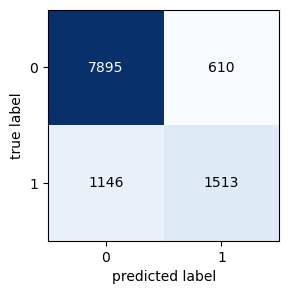

In [98]:
cm=confusion_matrix(y_test, y_test_pred)
plot_confusion_matrix(cm,figsize=(8,3)); 

In [99]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support



           0       0.87      0.93      0.90      8505

           1       0.71      0.57      0.63      2659



    accuracy                           0.84     11164

   macro avg       0.79      0.75      0.77     11164

weighted avg       0.83      0.84      0.84     11164




In [100]:
knn_precision=precision_score(y_test, y_test_pred)
knn_recall=recall_score(y_test, y_test_pred)
knn_f1=f1_score(y_test, y_test_pred)
knn_mse = mean_squared_error(y_test, y_test_pred)
knn_mse

0.15729129344321033

In [101]:
new_row = {'Accuracy': knn_acc,'Precision':knn_precision, 'Recall':knn_recall, 'F1-Score':knn_f1,'MSE':knn_mse}
evalation = evalation.append(new_row, ignore_index=True)

### Decision Tree

In [102]:
model =DecisionTreeClassifier()
parameters = {
              'max_features':[10,11,12,13],
              'max_depth':[8,10, 15, 20, 27]
}
classifier = GridSearchCV(model, parameters, cv=5);
# fitting the data to our model
classifier.fit(x, y);

In [103]:
# best parameters
best_parameters = classifier.best_params_
print(best_parameters)

{'max_depth': 8, 'max_features': 12}


In [104]:
# higest accuracy
highest_accuracy = classifier.best_score_*100
print(highest_accuracy,'%')

85.11958477701589 %


In [105]:
model =DecisionTreeClassifier(max_depth= 8, max_features =12)
model.fit(x_train , y_train)
y_test_pred = model.predict(x_test)
print('Train Score:',model.score(x_train , y_train))
print('Test Score:',model.score(x_test , y_test))

Train Score: 0.8550997253075361

Test Score: 0.8512182013615192


In [106]:
acc=accuracy_score(y_test, y_test_pred)
print('Model accuracy score: {0:0.4f}'. format(acc))

Model accuracy score: 0.8512


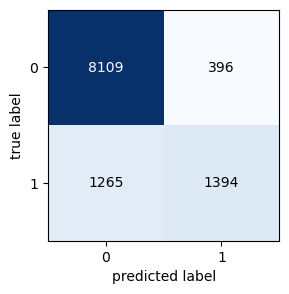

In [107]:
cm=confusion_matrix(y_test, y_test_pred)
plot_confusion_matrix(cm,figsize=(8,3)); 

In [108]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support



           0       0.87      0.95      0.91      8505

           1       0.78      0.52      0.63      2659



    accuracy                           0.85     11164

   macro avg       0.82      0.74      0.77     11164

weighted avg       0.84      0.85      0.84     11164




In [109]:
precision=precision_score(y_test, y_test_pred)
recall=recall_score(y_test, y_test_pred)
f1=f1_score(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
mse

0.14878179863848084

In [110]:
new_row = {'Accuracy': acc,'Precision':precision, 'Recall':recall, 'F1-Score':f1,'MSE':mse}
evalation = evalation.append(new_row, ignore_index=True)

### Random Forest 

In [111]:
model =RandomForestClassifier()
parameters = {
              'max_features':[10,11,12,13],
              'max_depth':[8,10, 15, 20, 27]
}
classifier = GridSearchCV(model, parameters, cv=5);
# fitting the data to our model
classifier.fit(x, y);

In [112]:
# best parameters
best_parameters = classifier.best_params_
print(best_parameters)

{'max_depth': 15, 'max_features': 12}


In [113]:
# higest accuracy
highest_accuracy = classifier.best_score_*100
print(highest_accuracy,'%')

85.96381558510755 %


In [114]:
model =RandomForestClassifier(max_depth= 15, max_features= 11)
model.fit(x_train , y_train)
y_test_pred = model.predict(x_test)
print('Train Score:',model.score(x_train , y_train))
print('Test Score:',model.score(x_test , y_test))

Train Score: 0.9094112026752658

Test Score: 0.8576675026872089


In [115]:
dt_acc=accuracy_score(y_test, y_test_pred)
print('Model accuracy score: {0:0.4f}'. format(dt_acc))

Model accuracy score: 0.8577


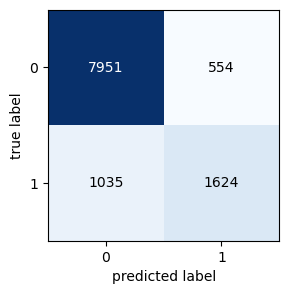

In [116]:
cm=confusion_matrix(y_test, y_test_pred)
plot_confusion_matrix(cm,figsize=(8,3)); 

In [117]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support



           0       0.88      0.93      0.91      8505

           1       0.75      0.61      0.67      2659



    accuracy                           0.86     11164

   macro avg       0.82      0.77      0.79     11164

weighted avg       0.85      0.86      0.85     11164




In [118]:
dt_precision=precision_score(y_test, y_test_pred)
dt_recall=recall_score(y_test, y_test_pred)
dt_f1=f1_score(y_test, y_test_pred)
dt_mse = mean_squared_error(y_test, y_test_pred)
dt_mse

0.1423324973127911

In [119]:
new_row = {'Accuracy': dt_acc,'Precision':dt_precision, 'Recall':dt_recall, 'F1-Score':dt_f1,'MSE':dt_mse}
evalation = evalation.append(new_row, ignore_index=True)

### XGB

In [120]:
warnings.filterwarnings("ignore")
model =XGBClassifier()
parameters = {
              'max_depth':[8,12,23],
              'learning_rate':[ 0.01, 0.1, 0.2],
              'booster':['dart', 'gbtree' ,'gblinear']
}
classifier = GridSearchCV(model, parameters, cv=5);
# fitting the data to our model
classifier.fit(x, y);


[22:08:56] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

[22:09:01] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

[22:09:08] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

[22:09:13] WARNI

In [121]:
# best parameters
best_parameters = classifier.best_params_
print(best_parameters)

{'booster': 'dart', 'learning_rate': 0.1, 'max_depth': 8}


In [122]:
# higest accuracy
highest_accuracy = classifier.best_score_*100
print(highest_accuracy,'%')

86.91553464855679 %


In [123]:
model =XGBClassifier(booster= 'dart',learning_rate= 0.1, max_depth= 8)
model.fit(x_train , y_train)
y_test_pred = model.predict(x_test)
print('Train Score:',model.score(x_train , y_train))
print('Test Score:',model.score(x_test , y_test))

[22:18:16] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

Train Score: 0.8863609220112265

Test Score: 0.8659978502328914


In [124]:
xgb_acc=accuracy_score(y_test, y_test_pred)
print('Model accuracy score: {0:0.4f}'. format(xgb_acc))

Model accuracy score: 0.8660


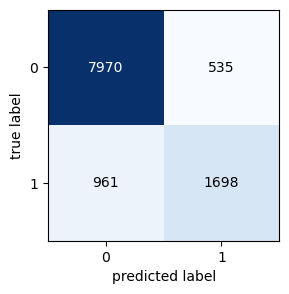

In [125]:
cm=confusion_matrix(y_test, y_test_pred)
plot_confusion_matrix(cm,figsize=(8,3)); 

In [126]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support



           0       0.89      0.94      0.91      8505

           1       0.76      0.64      0.69      2659



    accuracy                           0.87     11164

   macro avg       0.83      0.79      0.80     11164

weighted avg       0.86      0.87      0.86     11164




In [127]:
xgb_precision=precision_score(y_test, y_test_pred)
xgb_recall=recall_score(y_test, y_test_pred)
xgb_f1=f1_score(y_test, y_test_pred)
xgb_mse = mean_squared_error(y_test, y_test_pred)
xgb_mse

0.13400214976710856

In [128]:
new_row = {'Accuracy': xgb_acc,'Precision':xgb_precision, 'Recall':xgb_recall, 'F1-Score':xgb_f1,'MSE':xgb_mse}
evalation = evalation.append(new_row, ignore_index=True)

### SVM

#### RBF kernal 

In [129]:
svc_rbf = SVC(kernel='rbf',probability=True)
svc_rbf.fit(x_train, y_train)
Y_pred_rbf = svc_rbf.predict(x_test)

In [130]:
svc_rbf.score(x_train,y_train)

0.8506807595843784

In [131]:
svc_rbf.score(x_test,y_test)

0.8450376209243998

In [132]:
rbf_acc=accuracy_score(y_test,Y_pred_rbf)
print( "SVM accuracy using Gussian kernal: " + str(np.round(rbf_acc,3)))

SVM accuracy using Gussian kernal: 0.845


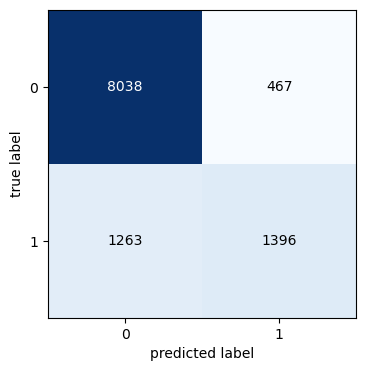

In [133]:
confusion_matrix_rbf=confusion_matrix(y_test, Y_pred_rbf)
plot_confusion_matrix(confusion_matrix_rbf,figsize=(10,4)); 

In [134]:
print(classification_report(y_test, Y_pred_rbf))

              precision    recall  f1-score   support



           0       0.86      0.95      0.90      8505

           1       0.75      0.53      0.62      2659



    accuracy                           0.85     11164

   macro avg       0.81      0.74      0.76     11164

weighted avg       0.84      0.85      0.83     11164




In [135]:
rbf_precision=precision_score(y_test, Y_pred_rbf)
rbf_recall=recall_score(y_test, Y_pred_rbf)
rbf_f1=f1_score(y_test, Y_pred_rbf)
rbf_mse = mean_squared_error(y_test, Y_pred_rbf)
rbf_mse

0.15496237907560015

#### Linear kernal 

In [136]:
svc_linear = SVC(kernel='linear',probability=True)
svc_linear.fit(x_train, y_train)
Y_pred_linear = svc_linear.predict(x_test)


In [137]:
svc_linear.score(x_train,y_train)

0.8123133882718261

In [138]:
svc_linear.score(x_test,y_test)

0.8107309208169114

In [139]:
linear_acc=accuracy_score(y_test,Y_pred_linear)
print( "SVM accuracy using Linear kernal: " + str(np.round(linear_acc,3)))

SVM accuracy using Linear kernal: 0.811


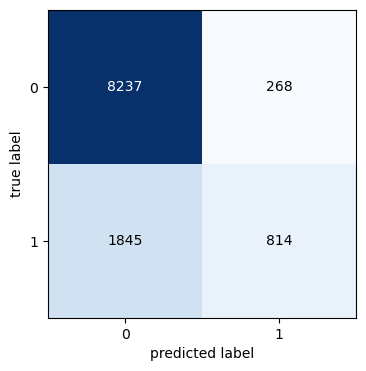

In [140]:
confusion_matrix_linear=confusion_matrix(y_test, Y_pred_linear)
plot_confusion_matrix(confusion_matrix_linear,figsize=(10,4)); 

In [141]:
print(classification_report(y_test, Y_pred_linear))

              precision    recall  f1-score   support



           0       0.82      0.97      0.89      8505

           1       0.75      0.31      0.44      2659



    accuracy                           0.81     11164

   macro avg       0.78      0.64      0.66     11164

weighted avg       0.80      0.81      0.78     11164




In [142]:
linear_precision=precision_score(y_test, Y_pred_linear)
linear_recall=recall_score(y_test, Y_pred_linear)
linear_f1=f1_score(y_test, Y_pred_linear)
linear_mse = mean_squared_error(y_test, Y_pred_linear)
linear_mse

0.1892690791830885

#### Poly kernal 

In [143]:
svc_poly = SVC(kernel='poly',probability=True)
svc_poly.fit(x_train, y_train)
Y_pred_poly = svc_poly.predict(x_test)

In [144]:
svc_poly.score(x_train,y_train)

0.8453063418129703

In [145]:
svc_poly.score(x_test,y_test)

0.8413651021139377

In [146]:
poly_acc=accuracy_score(y_test,Y_pred_poly)
print( "SVM accuracy using poly kernal : " + str(np.round(poly_acc,3)))

SVM accuracy using poly kernal : 0.841


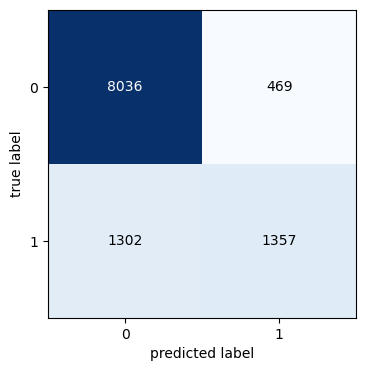

In [147]:
confusion_matrix_poly=confusion_matrix(y_test, Y_pred_poly)
plot_confusion_matrix(confusion_matrix_poly,figsize=(10,4)); 

In [148]:
print(classification_report(y_test, Y_pred_poly))

              precision    recall  f1-score   support



           0       0.86      0.94      0.90      8505

           1       0.74      0.51      0.61      2659



    accuracy                           0.84     11164

   macro avg       0.80      0.73      0.75     11164

weighted avg       0.83      0.84      0.83     11164




In [149]:
poly_precision=precision_score(y_test, Y_pred_poly)
poly_recall=recall_score(y_test, Y_pred_poly)
poly_f1=f1_score(y_test, Y_pred_poly)
poly_mse = mean_squared_error(y_test, Y_pred_poly)
poly_mse

0.15863489788606233

#### Evaluation

In [150]:
eval=evalation.copy()

In [151]:
new_row = {'Accuracy': rbf_acc,'Precision':rbf_precision, 'Recall':rbf_recall, 'F1-Score':rbf_f1,'MSE':rbf_mse}
evalation = evalation.append(new_row, ignore_index=True)

In [152]:
new_row = {'Accuracy': linear_acc,'Precision':linear_precision, 'Recall':linear_recall, 'F1-Score':linear_f1,'MSE':linear_mse}
evalation = evalation.append(new_row, ignore_index=True)

In [153]:
new_row = {'Accuracy': poly_acc,'Precision':poly_precision, 'Recall':poly_recall, 'F1-Score':poly_f1,'MSE':poly_mse}
evalation = evalation.append(new_row, ignore_index=True)

In [154]:
index=['Logistic Regression','KNN','Decision Tree','Random Forest','XGB','RBF_SVC','linear_SVC','poly_SVC' ]
evalation.set_axis(index,inplace=True)

In [155]:
evalation = evalation.sort_values(by=['MSE'], ascending=True)
evalation

,Accuracy,Precision,Recall,F1-Score,MSE
XGB,0.865998,0.760412,0.638586,0.694195,0.134002
Random Forest,0.857668,0.745638,0.610756,0.671491,0.142332
Decision Tree,0.851218,0.778771,0.524257,0.626658,0.148782
RBF_SVC,0.845038,0.749329,0.525009,0.617426,0.154962
KNN,0.842709,0.712671,0.569011,0.632790,0.157291
poly_SVC,0.841365,0.743154,0.510342,0.605128,0.158635
Logistic Regression,0.818524,0.687611,0.436254,0.533824,0.181476
linear_SVC,0.810731,0.752311,0.306130,0.435178,0.189269


## Random Oversampling

In [156]:
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy='minority')
X_over, y_over = oversample.fit_resample(x, y)

In [157]:
x_train, x_test, y_train, y_test = train_test_split(X_over,y_over,test_size=0.25,random_state=101)

scaler = StandardScaler()
scaler.fit(x_train)
X_train = scaler.transform(x_train)
X_test = scaler.transform(x_test)
Oversampling_evalation=pd.DataFrame(columns=['Accuracy','Precision','Recall','F1-Score','MSE'])


### Logistic Regression

In [158]:
model =LogisticRegression(C= 100, solver= 'lbfgs')
model.fit(x_train , y_train)
y_test_pred = model.predict(x_test)
print('Train Score:',model.score(x_train , y_train))
print('Test Score:',model.score(x_test , y_test))

Train Score: 0.7378829536527887

Test Score: 0.7428419936373277


In [159]:
lr_acc=accuracy_score(y_test, y_test_pred)
print('Model accuracy score: {0:0.4f}'. format(lr_acc))

Model accuracy score: 0.7428


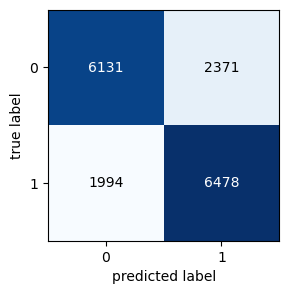

In [160]:
cm=confusion_matrix(y_test, y_test_pred)
plot_confusion_matrix(cm,figsize=(8,3)); 

In [161]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support



           0       0.75      0.72      0.74      8502

           1       0.73      0.76      0.75      8472



    accuracy                           0.74     16974

   macro avg       0.74      0.74      0.74     16974

weighted avg       0.74      0.74      0.74     16974




In [162]:
lr_precision=precision_score(y_test, y_test_pred)
lr_recall=recall_score(y_test, y_test_pred)
lr_f1=f1_score(y_test, y_test_pred)
lr_mse = mean_squared_error(y_test, y_test_pred)
lr_mse

0.25715800636267233

In [163]:
new_row = {'Accuracy': lr_acc,'Precision':lr_precision, 'Recall':lr_recall, 'F1-Score':lr_f1,'MSE':lr_mse}
Oversampling_evalation = Oversampling_evalation.append(new_row, ignore_index=True)

### KNN

In [164]:
model =KNeighborsClassifier(leaf_size= 12, n_neighbors= 14)
model.fit(x_train , y_train)
y_test_pred = model.predict(x_test)
print('Train Score:',model.score(x_train , y_train))
print('Test Score:',model.score(x_test , y_test))

Train Score: 0.841987431264729

Test Score: 0.8183692706492283


In [165]:
knn_acc=accuracy_score(y_test, y_test_pred)
print('Model accuracy score: {0:0.4f}'. format(knn_acc))

Model accuracy score: 0.8184


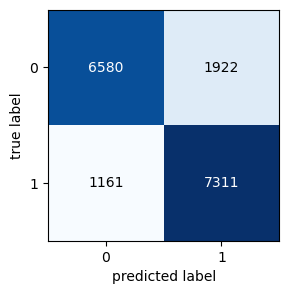

In [166]:
cm=confusion_matrix(y_test, y_test_pred)
plot_confusion_matrix(cm,figsize=(8,3)); 

In [167]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support



           0       0.85      0.77      0.81      8502

           1       0.79      0.86      0.83      8472



    accuracy                           0.82     16974

   macro avg       0.82      0.82      0.82     16974

weighted avg       0.82      0.82      0.82     16974




In [168]:
knn_precision=precision_score(y_test, y_test_pred)
knn_recall=recall_score(y_test, y_test_pred)
knn_f1=f1_score(y_test, y_test_pred)
knn_mse = mean_squared_error(y_test, y_test_pred)
knn_mse

0.18163072935077176

In [169]:
new_row = {'Accuracy': knn_acc,'Precision':knn_precision, 'Recall':knn_recall, 'F1-Score':knn_f1,'MSE':knn_mse}
Oversampling_evalation = Oversampling_evalation.append(new_row, ignore_index=True)

### Decision Tree

In [170]:
model =DecisionTreeClassifier(max_depth= 8, max_features =12)
model.fit(x_train , y_train)
y_test_pred = model.predict(x_test)
print('Train Score:',model.score(x_train , y_train))
print('Test Score:',model.score(x_test , y_test))

Train Score: 0.825903377847604

Test Score: 0.8234947566866972


In [171]:
acc=accuracy_score(y_test, y_test_pred)
print('Model accuracy score: {0:0.4f}'. format(acc))

Model accuracy score: 0.8235


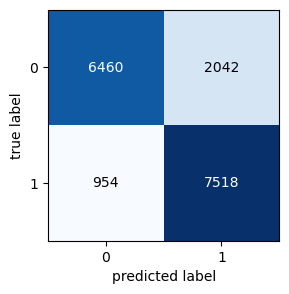

In [172]:
cm=confusion_matrix(y_test, y_test_pred)
plot_confusion_matrix(cm,figsize=(8,3)); 

In [173]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support



           0       0.87      0.76      0.81      8502

           1       0.79      0.89      0.83      8472



    accuracy                           0.82     16974

   macro avg       0.83      0.82      0.82     16974

weighted avg       0.83      0.82      0.82     16974




In [174]:
precision=precision_score(y_test, y_test_pred)
recall=recall_score(y_test, y_test_pred)
f1=f1_score(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
mse

0.1765052433133027

In [175]:
new_row = {'Accuracy': acc,'Precision':precision, 'Recall':recall, 'F1-Score':f1,'MSE':mse}
Oversampling_evalation = Oversampling_evalation.append(new_row, ignore_index=True)

### Random Forest 

In [176]:
model =RandomForestClassifier(max_depth= 15, max_features= 11)
model.fit(x_train , y_train)
y_test_pred = model.predict(x_test)
print('Train Score:',model.score(x_train , y_train))
print('Test Score:',model.score(x_test , y_test))

Train Score: 0.9025530243519246

Test Score: 0.8759868033462943


In [177]:
dt_acc=accuracy_score(y_test, y_test_pred)
print('Model accuracy score: {0:0.4f}'. format(dt_acc))

Model accuracy score: 0.8760


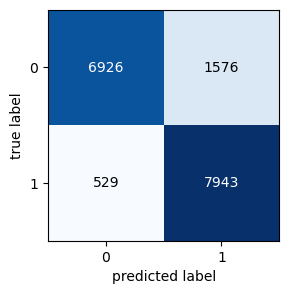

In [178]:
cm=confusion_matrix(y_test, y_test_pred)
plot_confusion_matrix(cm,figsize=(8,3)); 

In [179]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support



           0       0.93      0.81      0.87      8502

           1       0.83      0.94      0.88      8472



    accuracy                           0.88     16974

   macro avg       0.88      0.88      0.88     16974

weighted avg       0.88      0.88      0.88     16974




In [180]:
dt_precision=precision_score(y_test, y_test_pred)
dt_recall=recall_score(y_test, y_test_pred)
dt_f1=f1_score(y_test, y_test_pred)
dt_mse = mean_squared_error(y_test, y_test_pred)
dt_mse

0.12401319665370567

In [181]:
new_row = {'Accuracy': dt_acc,'Precision':dt_precision, 'Recall':dt_recall, 'F1-Score':dt_f1,'MSE':dt_mse}
Oversampling_evalation = Oversampling_evalation.append(new_row, ignore_index=True)

### XGB

In [182]:
model =XGBClassifier(booster= 'dart',learning_rate= 0.1, max_depth= 8)
model.fit(x_train , y_train)
y_test_pred = model.predict(x_test)
print('Train Score:',model.score(x_train , y_train))
print('Test Score:',model.score(x_test , y_test))

[22:29:38] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

Train Score: 0.8672623723487825

Test Score: 0.8537174502179804


In [183]:
xgb_acc=accuracy_score(y_test, y_test_pred)
print('Model accuracy score: {0:0.4f}'. format(xgb_acc))

Model accuracy score: 0.8537


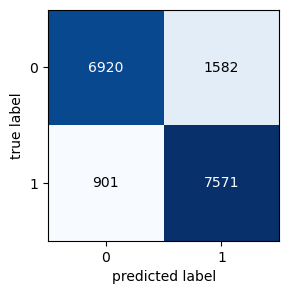

In [184]:
cm=confusion_matrix(y_test, y_test_pred)
plot_confusion_matrix(cm,figsize=(8,3)); 

In [185]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support



           0       0.88      0.81      0.85      8502

           1       0.83      0.89      0.86      8472



    accuracy                           0.85     16974

   macro avg       0.86      0.85      0.85     16974

weighted avg       0.86      0.85      0.85     16974




In [186]:
xgb_precision=precision_score(y_test, y_test_pred)
xgb_recall=recall_score(y_test, y_test_pred)
xgb_f1=f1_score(y_test, y_test_pred)
xgb_mse = mean_squared_error(y_test, y_test_pred)
xgb_mse

0.14628254978201957

In [187]:
new_row = {'Accuracy': xgb_acc,'Precision':xgb_precision, 'Recall':xgb_recall, 'F1-Score':xgb_f1,'MSE':xgb_mse}
Oversampling_evalation = Oversampling_evalation.append(new_row, ignore_index=True)

### SVM

#### RBF kernal 

In [188]:
svc_rbf = SVC(kernel='rbf',probability=True)
svc_rbf.fit(x_train, y_train)
Y_pred_rbf = svc_rbf.predict(x_test)

In [189]:
svc_rbf.score(x_train,y_train)

0.6078161822466615

In [190]:
svc_rbf.score(x_test,y_test)

0.6056321432779546

In [191]:
rbf_acc=accuracy_score(y_test,Y_pred_rbf)
print( "SVM accuracy using Gussian kernal: " + str(np.round(rbf_acc,3)))

SVM accuracy using Gussian kernal: 0.606


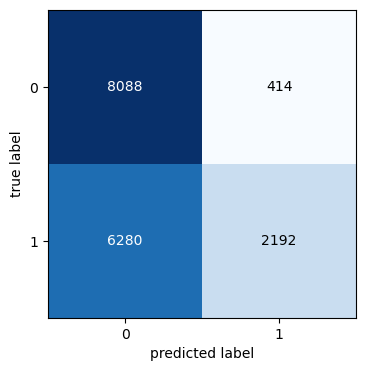

In [192]:
confusion_matrix_rbf=confusion_matrix(y_test, Y_pred_rbf)
plot_confusion_matrix(confusion_matrix_rbf,figsize=(10,4)); 

In [193]:
print(classification_report(y_test, Y_pred_rbf))

              precision    recall  f1-score   support



           0       0.56      0.95      0.71      8502

           1       0.84      0.26      0.40      8472



    accuracy                           0.61     16974

   macro avg       0.70      0.61      0.55     16974

weighted avg       0.70      0.61      0.55     16974




In [194]:
rbf_precision=precision_score(y_test, Y_pred_rbf)
rbf_recall=recall_score(y_test, Y_pred_rbf)
rbf_f1=f1_score(y_test, Y_pred_rbf)
rbf_mse = mean_squared_error(y_test, Y_pred_rbf)
rbf_mse

0.3943678567220455

#### Evaluation

In [195]:
new_row = {'Accuracy': rbf_acc,'Precision':rbf_precision, 'Recall':rbf_recall, 'F1-Score':rbf_f1,'MSE':rbf_mse}
Oversampling_evalation = Oversampling_evalation.append(new_row, ignore_index=True)

In [196]:
index=['Logistic Regression','KNN','Decision Tree','Random Forest','XGB','RBF_SVC' ]
Oversampling_evalation.set_axis(index,inplace=True)

In [197]:
Oversampling_evalation = Oversampling_evalation.sort_values(by=['MSE'], ascending=True)
Oversampling_evalation

,Accuracy,Precision,Recall,F1-Score,MSE
Random Forest,0.875987,0.834436,0.937559,0.882997,0.124013
XGB,0.853717,0.827160,0.893650,0.859121,0.146283
Decision Tree,0.823495,0.786402,0.887394,0.833851,0.176505
KNN,0.818369,0.791834,0.862960,0.825868,0.181631
Logistic Regression,0.742842,0.732060,0.764636,0.747994,0.257158
RBF_SVC,0.605632,0.841136,0.258735,0.395739,0.394368


## SMOTE

In [198]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_res, y_res = oversample.fit_resample(x, y)

In [199]:
x_train, x_test, y_train, y_test = train_test_split(X_res,y_res,test_size=0.25,random_state=101)

scaler = StandardScaler()
scaler.fit(x_train)
X_train = scaler.transform(x_train)
X_test = scaler.transform(x_test)
Oversampling_evalation=pd.DataFrame(columns=['Accuracy','Precision','Recall','F1-Score','MSE'])


### Logistic Regression

In [200]:
model =LogisticRegression(C= 100, solver= 'lbfgs')
model.fit(x_train , y_train)
y_test_pred = model.predict(x_test)
print('Train Score:',model.score(x_train , y_train))
print('Test Score:',model.score(x_test , y_test))

Train Score: 0.7521209740769835

Test Score: 0.7589843289737245


In [201]:
lr_acc=accuracy_score(y_test, y_test_pred)
print('Model accuracy score: {0:0.4f}'. format(lr_acc))

Model accuracy score: 0.7590


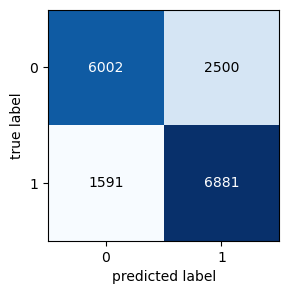

In [202]:
cm=confusion_matrix(y_test, y_test_pred)
plot_confusion_matrix(cm,figsize=(8,3)); 

In [203]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support



           0       0.79      0.71      0.75      8502

           1       0.73      0.81      0.77      8472



    accuracy                           0.76     16974

   macro avg       0.76      0.76      0.76     16974

weighted avg       0.76      0.76      0.76     16974




In [204]:
lr_precision=precision_score(y_test, y_test_pred)
lr_recall=recall_score(y_test, y_test_pred)
lr_f1=f1_score(y_test, y_test_pred)
lr_mse = mean_squared_error(y_test, y_test_pred)
lr_mse

0.24101567102627547

In [205]:
new_row = {'Accuracy': lr_acc,'Precision':lr_precision, 'Recall':lr_recall, 'F1-Score':lr_f1,'MSE':lr_mse}
Oversampling_evalation = Oversampling_evalation.append(new_row, ignore_index=True)

### KNN

In [206]:
model =KNeighborsClassifier(leaf_size= 12, n_neighbors= 14)
model.fit(x_train , y_train)
y_test_pred = model.predict(x_test)
print('Train Score:',model.score(x_train , y_train))
print('Test Score:',model.score(x_test , y_test))

Train Score: 0.8591319717203456

Test Score: 0.8370448921880523


In [207]:
knn_acc=accuracy_score(y_test, y_test_pred)
print('Model accuracy score: {0:0.4f}'. format(knn_acc))

Model accuracy score: 0.8370


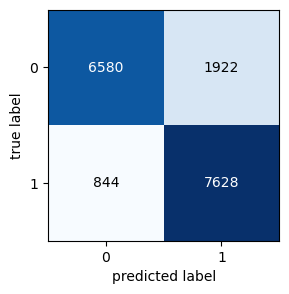

In [208]:
cm=confusion_matrix(y_test, y_test_pred)
plot_confusion_matrix(cm,figsize=(8,3)); 

In [209]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support



           0       0.89      0.77      0.83      8502

           1       0.80      0.90      0.85      8472



    accuracy                           0.84     16974

   macro avg       0.84      0.84      0.84     16974

weighted avg       0.84      0.84      0.84     16974




In [210]:
knn_precision=precision_score(y_test, y_test_pred)
knn_recall=recall_score(y_test, y_test_pred)
knn_f1=f1_score(y_test, y_test_pred)
knn_mse = mean_squared_error(y_test, y_test_pred)
knn_mse

0.1629551078119477

In [211]:
new_row = {'Accuracy': knn_acc,'Precision':knn_precision, 'Recall':knn_recall, 'F1-Score':knn_f1,'MSE':knn_mse}
Oversampling_evalation = Oversampling_evalation.append(new_row, ignore_index=True)

### Decision Tree

In [212]:
model =DecisionTreeClassifier(max_depth= 8, max_features =12)
model.fit(x_train , y_train)
y_test_pred = model.predict(x_test)
print('Train Score:',model.score(x_train , y_train))
print('Test Score:',model.score(x_test , y_test))

Train Score: 0.8471916732128829

Test Score: 0.8480617414869801


In [213]:
acc=accuracy_score(y_test, y_test_pred)
print('Model accuracy score: {0:0.4f}'. format(acc))

Model accuracy score: 0.8481


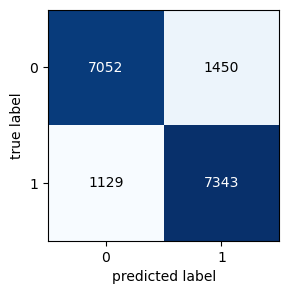

In [214]:
cm=confusion_matrix(y_test, y_test_pred)
plot_confusion_matrix(cm,figsize=(8,3)); 

In [215]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support



           0       0.86      0.83      0.85      8502

           1       0.84      0.87      0.85      8472



    accuracy                           0.85     16974

   macro avg       0.85      0.85      0.85     16974

weighted avg       0.85      0.85      0.85     16974




In [216]:
precision=precision_score(y_test, y_test_pred)
recall=recall_score(y_test, y_test_pred)
f1=f1_score(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
mse

0.15193825851301992

In [217]:
new_row = {'Accuracy': acc,'Precision':precision, 'Recall':recall, 'F1-Score':f1,'MSE':mse}
Oversampling_evalation = Oversampling_evalation.append(new_row, ignore_index=True)

### Random Forest 

In [218]:
model =RandomForestClassifier(max_depth= 15, max_features= 11)
model.fit(x_train , y_train)
y_test_pred = model.predict(x_test)
print('Train Score:',model.score(x_train , y_train))
print('Test Score:',model.score(x_test , y_test))

Train Score: 0.9087391987431265

Test Score: 0.8775185577942736


In [219]:
dt_acc=accuracy_score(y_test, y_test_pred)
print('Model accuracy score: {0:0.4f}'. format(dt_acc))

Model accuracy score: 0.8775


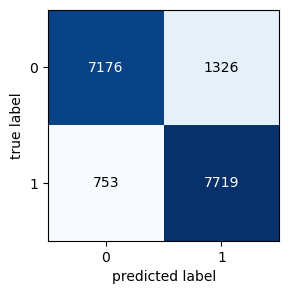

In [220]:
cm=confusion_matrix(y_test, y_test_pred)
plot_confusion_matrix(cm,figsize=(8,3)); 

In [221]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support



           0       0.91      0.84      0.87      8502

           1       0.85      0.91      0.88      8472



    accuracy                           0.88     16974

   macro avg       0.88      0.88      0.88     16974

weighted avg       0.88      0.88      0.88     16974




In [222]:
dt_precision=precision_score(y_test, y_test_pred)
dt_recall=recall_score(y_test, y_test_pred)
dt_f1=f1_score(y_test, y_test_pred)
dt_mse = mean_squared_error(y_test, y_test_pred)
dt_mse

0.1224814422057264

In [223]:
new_row = {'Accuracy': dt_acc,'Precision':dt_precision, 'Recall':dt_recall, 'F1-Score':dt_f1,'MSE':dt_mse}
Oversampling_evalation = Oversampling_evalation.append(new_row, ignore_index=True)

### XGB

In [224]:
model =XGBClassifier(booster= 'dart',learning_rate= 0.1, max_depth= 8)
model.fit(x_train , y_train)
y_test_pred = model.predict(x_test)
print('Train Score:',model.score(x_train , y_train))
print('Test Score:',model.score(x_test , y_test))

[22:52:02] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

Train Score: 0.8882560879811469

Test Score: 0.8796394485683987


In [225]:
xgb_acc=accuracy_score(y_test, y_test_pred)
print('Model accuracy score: {0:0.4f}'. format(xgb_acc))

Model accuracy score: 0.8796


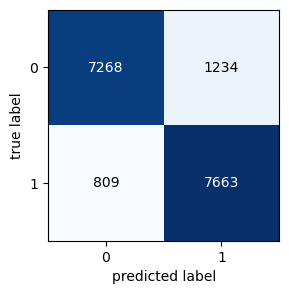

In [226]:
cm=confusion_matrix(y_test, y_test_pred)
plot_confusion_matrix(cm,figsize=(8,3)); 

In [227]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support



           0       0.90      0.85      0.88      8502

           1       0.86      0.90      0.88      8472



    accuracy                           0.88     16974

   macro avg       0.88      0.88      0.88     16974

weighted avg       0.88      0.88      0.88     16974




In [228]:
xgb_precision=precision_score(y_test, y_test_pred)
xgb_recall=recall_score(y_test, y_test_pred)
xgb_f1=f1_score(y_test, y_test_pred)
xgb_mse = mean_squared_error(y_test, y_test_pred)
xgb_mse

0.12036055143160128

In [229]:
new_row = {'Accuracy': xgb_acc,'Precision':xgb_precision, 'Recall':xgb_recall, 'F1-Score':xgb_f1,'MSE':xgb_mse}
Oversampling_evalation = Oversampling_evalation.append(new_row, ignore_index=True)

### SVM

#### RBF kernal 

In [230]:
svc_rbf = SVC(kernel='rbf',probability=True)
svc_rbf.fit(x_train, y_train)
Y_pred_rbf = svc_rbf.predict(x_test)

In [231]:
svc_rbf.score(x_train,y_train)

0.6086999214454045

In [232]:
svc_rbf.score(x_test,y_test)

0.6086367385412984

In [233]:
rbf_acc=accuracy_score(y_test,Y_pred_rbf)
print( "SVM accuracy using Gussian kernal: " + str(np.round(rbf_acc,3)))

SVM accuracy using Gussian kernal: 0.609


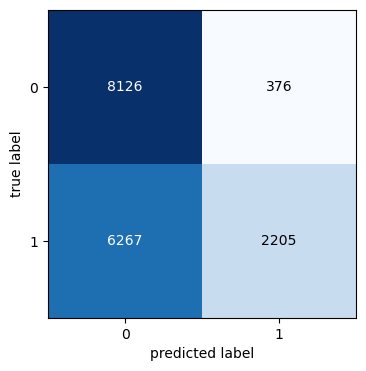

In [234]:
confusion_matrix_rbf=confusion_matrix(y_test, Y_pred_rbf)
plot_confusion_matrix(confusion_matrix_rbf,figsize=(10,4)); 

In [235]:
print(classification_report(y_test, Y_pred_rbf))

              precision    recall  f1-score   support



           0       0.56      0.96      0.71      8502

           1       0.85      0.26      0.40      8472



    accuracy                           0.61     16974

   macro avg       0.71      0.61      0.55     16974

weighted avg       0.71      0.61      0.55     16974




In [236]:
rbf_precision=precision_score(y_test, Y_pred_rbf)
rbf_recall=recall_score(y_test, Y_pred_rbf)
rbf_f1=f1_score(y_test, Y_pred_rbf)
rbf_mse = mean_squared_error(y_test, Y_pred_rbf)
rbf_mse

0.39136326145870154

#### Evaluation

In [237]:
new_row = {'Accuracy': rbf_acc,'Precision':rbf_precision, 'Recall':rbf_recall, 'F1-Score':rbf_f1,'MSE':rbf_mse}
Oversampling_evalation = Oversampling_evalation.append(new_row, ignore_index=True)

In [238]:
index=['Logistic Regression','KNN','Decision Tree','Random Forest','XGB','RBF_SVC' ]
Oversampling_evalation.set_axis(index,inplace=True)

In [239]:
Oversampling_evalation = Oversampling_evalation.sort_values(by=['MSE'], ascending=True)
Oversampling_evalation

,Accuracy,Precision,Recall,F1-Score,MSE
XGB,0.879639,0.861302,0.904509,0.882377,0.120361
Random Forest,0.877519,0.853400,0.911119,0.881315,0.122481
Decision Tree,0.848062,0.835096,0.866737,0.850623,0.151938
KNN,0.837045,0.798743,0.900378,0.846521,0.162955
Logistic Regression,0.758984,0.733504,0.812205,0.770851,0.241016
RBF_SVC,0.608637,0.854320,0.260269,0.398987,0.391363


## Undersampling

In [240]:
from imblearn.under_sampling import TomekLinks
undersample=TomekLinks()
X_tl, y_tl = undersample.fit_resample(x, y)

In [241]:
x_train, x_test, y_train, y_test = train_test_split(X_tl,y_tl,test_size=0.25,random_state=101)

scaler = StandardScaler()
scaler.fit(x_train)
X_train = scaler.transform(x_train)
X_test = scaler.transform(x_test)
Undersampling_evalation=pd.DataFrame(columns=['Accuracy','Precision','Recall','F1-Score','MSE'])


### Logistic Regression

In [242]:
model =LogisticRegression(C= 100, solver= 'lbfgs')
model.fit(x_train , y_train)
y_test_pred = model.predict(x_test)
print('Train Score:',model.score(x_train , y_train))
print('Test Score:',model.score(x_test , y_test))

Train Score: 0.7992395204072246

Test Score: 0.8011222518627541


In [243]:
lr_acc=accuracy_score(y_test, y_test_pred)
print('Model accuracy score: {0:0.4f}'. format(lr_acc))

Model accuracy score: 0.8011


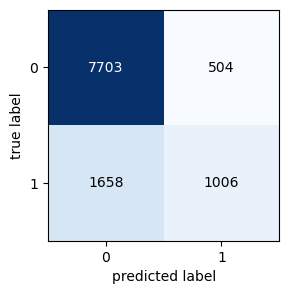

In [244]:
cm=confusion_matrix(y_test, y_test_pred)
plot_confusion_matrix(cm,figsize=(8,3)); 

In [245]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support



           0       0.82      0.94      0.88      8207

           1       0.67      0.38      0.48      2664



    accuracy                           0.80     10871

   macro avg       0.74      0.66      0.68     10871

weighted avg       0.78      0.80      0.78     10871




In [246]:
lr_precision=precision_score(y_test, y_test_pred)
lr_recall=recall_score(y_test, y_test_pred)
lr_f1=f1_score(y_test, y_test_pred)
lr_mse = mean_squared_error(y_test, y_test_pred)
lr_mse

0.19887774813724587

In [247]:
new_row = {'Accuracy': lr_acc,'Precision':lr_precision, 'Recall':lr_recall, 'F1-Score':lr_f1,'MSE':lr_mse}
Undersampling_evalation = Undersampling_evalation.append(new_row, ignore_index=True)

### KNN

In [248]:
model =KNeighborsClassifier(leaf_size= 12, n_neighbors= 14)
model.fit(x_train , y_train)
y_test_pred = model.predict(x_test)
print('Train Score:',model.score(x_train , y_train))
print('Test Score:',model.score(x_test , y_test))

Train Score: 0.8640336082916807

Test Score: 0.8510716585410726


In [249]:
knn_acc=accuracy_score(y_test, y_test_pred)
print('Model accuracy score: {0:0.4f}'. format(knn_acc))

Model accuracy score: 0.8511


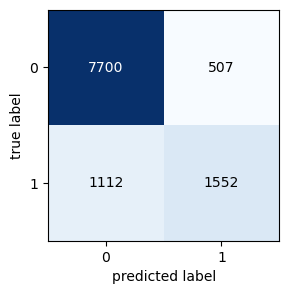

In [250]:
cm=confusion_matrix(y_test, y_test_pred)
plot_confusion_matrix(cm,figsize=(8,3)); 

In [251]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support



           0       0.87      0.94      0.90      8207

           1       0.75      0.58      0.66      2664



    accuracy                           0.85     10871

   macro avg       0.81      0.76      0.78     10871

weighted avg       0.84      0.85      0.84     10871




In [252]:
knn_precision=precision_score(y_test, y_test_pred)
knn_recall=recall_score(y_test, y_test_pred)
knn_f1=f1_score(y_test, y_test_pred)
knn_mse = mean_squared_error(y_test, y_test_pred)
knn_mse

0.14892834145892742

In [253]:
new_row = {'Accuracy': knn_acc,'Precision':knn_precision, 'Recall':knn_recall, 'F1-Score':knn_f1,'MSE':knn_mse}
Undersampling_evalation = Undersampling_evalation.append(new_row, ignore_index=True)

### Decision Tree

In [254]:
model =DecisionTreeClassifier(max_depth= 8, max_features =12)
model.fit(x_train , y_train)
y_test_pred = model.predict(x_test)
print('Train Score:',model.score(x_train , y_train))
print('Test Score:',model.score(x_test , y_test))

Train Score: 0.8584526693446997

Test Score: 0.8550271364179928


In [255]:
acc=accuracy_score(y_test, y_test_pred)
print('Model accuracy score: {0:0.4f}'. format(acc))

Model accuracy score: 0.8550


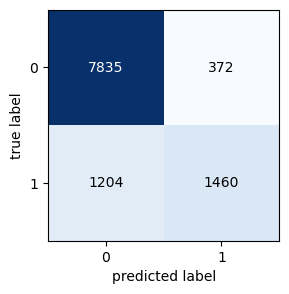

In [256]:
cm=confusion_matrix(y_test, y_test_pred)
plot_confusion_matrix(cm,figsize=(8,3)); 

In [257]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support



           0       0.87      0.95      0.91      8207

           1       0.80      0.55      0.65      2664



    accuracy                           0.86     10871

   macro avg       0.83      0.75      0.78     10871

weighted avg       0.85      0.86      0.85     10871




In [258]:
precision=precision_score(y_test, y_test_pred)
recall=recall_score(y_test, y_test_pred)
f1=f1_score(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
mse

0.14497286358200717

In [259]:
new_row = {'Accuracy': acc,'Precision':precision, 'Recall':recall, 'F1-Score':f1,'MSE':mse}
Undersampling_evalation = Undersampling_evalation.append(new_row, ignore_index=True)

### Random Forest 

In [260]:
model =RandomForestClassifier(max_depth= 15, max_features= 11)
model.fit(x_train , y_train)
y_test_pred = model.predict(x_test)
print('Train Score:',model.score(x_train , y_train))
print('Test Score:',model.score(x_test , y_test))

Train Score: 0.9141394008156757

Test Score: 0.8639499586054641


In [261]:
dt_acc=accuracy_score(y_test, y_test_pred)
print('Model accuracy score: {0:0.4f}'. format(dt_acc))

Model accuracy score: 0.8639


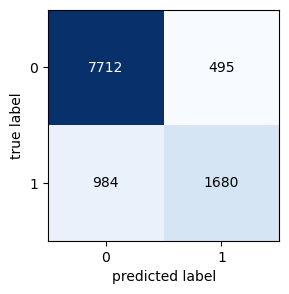

In [262]:
cm=confusion_matrix(y_test, y_test_pred)
plot_confusion_matrix(cm,figsize=(8,3)); 

In [263]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support



           0       0.89      0.94      0.91      8207

           1       0.77      0.63      0.69      2664



    accuracy                           0.86     10871

   macro avg       0.83      0.79      0.80     10871

weighted avg       0.86      0.86      0.86     10871




In [264]:
dt_precision=precision_score(y_test, y_test_pred)
dt_recall=recall_score(y_test, y_test_pred)
dt_f1=f1_score(y_test, y_test_pred)
dt_mse = mean_squared_error(y_test, y_test_pred)
dt_mse

0.13605004139453591

In [265]:
new_row = {'Accuracy': dt_acc,'Precision':dt_precision, 'Recall':dt_recall, 'F1-Score':dt_f1,'MSE':dt_mse}
Undersampling_evalation = Undersampling_evalation.append(new_row, ignore_index=True)

### XGB

In [266]:
model =XGBClassifier(booster= 'dart',learning_rate= 0.1, max_depth= 8)
model.fit(x_train , y_train)
y_test_pred = model.predict(x_test)
print('Train Score:',model.score(x_train , y_train))
print('Test Score:',model.score(x_test , y_test))

[23:14:01] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

Train Score: 0.8900677685443562

Test Score: 0.875724404378622


In [267]:
xgb_acc=accuracy_score(y_test, y_test_pred)
print('Model accuracy score: {0:0.4f}'. format(xgb_acc))

Model accuracy score: 0.8757


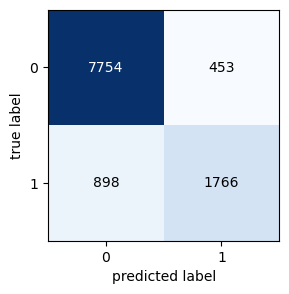

In [268]:
cm=confusion_matrix(y_test, y_test_pred)
plot_confusion_matrix(cm,figsize=(8,3)); 

In [269]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support



           0       0.90      0.94      0.92      8207

           1       0.80      0.66      0.72      2664



    accuracy                           0.88     10871

   macro avg       0.85      0.80      0.82     10871

weighted avg       0.87      0.88      0.87     10871




In [270]:
xgb_precision=precision_score(y_test, y_test_pred)
xgb_recall=recall_score(y_test, y_test_pred)
xgb_f1=f1_score(y_test, y_test_pred)
xgb_mse = mean_squared_error(y_test, y_test_pred)
xgb_mse

0.12427559562137798

In [271]:
new_row = {'Accuracy': xgb_acc,'Precision':xgb_precision, 'Recall':xgb_recall, 'F1-Score':xgb_f1,'MSE':xgb_mse}
Undersampling_evalation = Undersampling_evalation.append(new_row, ignore_index=True)

### SVM

#### RBF kernal 

In [272]:
svc_rbf = SVC(kernel='rbf',probability=True)
svc_rbf.fit(x_train, y_train)
Y_pred_rbf = svc_rbf.predict(x_test)

In [273]:
svc_rbf.score(x_train,y_train)

0.8006500873938242

In [274]:
svc_rbf.score(x_test,y_test)

0.8021341182963849

In [275]:
rbf_acc=accuracy_score(y_test,Y_pred_rbf)
print( "SVM accuracy using Gussian kernal: " + str(np.round(rbf_acc,3)))

SVM accuracy using Gussian kernal: 0.802


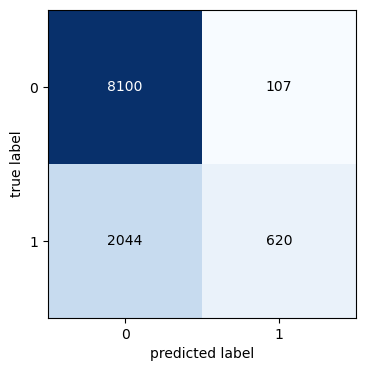

In [276]:
confusion_matrix_rbf=confusion_matrix(y_test, Y_pred_rbf)
plot_confusion_matrix(confusion_matrix_rbf,figsize=(10,4)); 

In [277]:
print(classification_report(y_test, Y_pred_rbf))

              precision    recall  f1-score   support



           0       0.80      0.99      0.88      8207

           1       0.85      0.23      0.37      2664



    accuracy                           0.80     10871

   macro avg       0.83      0.61      0.62     10871

weighted avg       0.81      0.80      0.76     10871




In [278]:
rbf_precision=precision_score(y_test, Y_pred_rbf)
rbf_recall=recall_score(y_test, Y_pred_rbf)
rbf_f1=f1_score(y_test, Y_pred_rbf)
rbf_mse = mean_squared_error(y_test, Y_pred_rbf)
rbf_mse

0.19786588170361513

#### Evaluation

In [279]:
new_row = {'Accuracy': rbf_acc,'Precision':rbf_precision, 'Recall':rbf_recall, 'F1-Score':rbf_f1,'MSE':rbf_mse}
Undersampling_evalation = Undersampling_evalation.append(new_row, ignore_index=True)

In [280]:
index=['Logistic Regression','KNN','Decision Tree','Random Forest','XGB','RBF_SVC']
Undersampling_evalation.set_axis(index,inplace=True)

In [281]:
Undersampling_evalation = Undersampling_evalation.sort_values(by=['MSE'], ascending=True)
Undersampling_evalation

,Accuracy,Precision,Recall,F1-Score,MSE
XGB,0.875724,0.795854,0.662913,0.723326,0.124276
Random Forest,0.863950,0.772414,0.630631,0.694358,0.136050
Decision Tree,0.855027,0.796943,0.548048,0.649466,0.144973
KNN,0.851072,0.753764,0.582583,0.657209,0.148928
RBF_SVC,0.802134,0.852820,0.232733,0.365674,0.197866
Logistic Regression,0.801122,0.666225,0.377628,0.482032,0.198878


- XGBoost classifier shows the best accuracies so that's what i'm going to use for deployment 